# Social media behavior analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving Time_Wasters.csv to Time_Wasters.csv


{'Time_Wasters.csv': b'UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,Number of Sessions,Video ID,Video Category,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType\r\n1,56,Male,Pakistan,82812,TRUE,TRUE,Engineer,Rural,Instagram,80,17,4229,Pranks,24,7867,5,26,22,87,Night,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data\r\n2,46,Female,Mexico,27999,FALSE,TRUE,Artist,Urban,Instagram,228,14,2131,Pranks,19,5944,6,25,31,46,Afternoon,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi\r\n3,32,Female,United States,42436,FALSE,TRUE,Engineer,Rural,Facebook,30,6,4367,Vlogs,19,8674,3,9,7,88,Evening,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data\r\n4,60,Male,Barzil,62963,TRUE,FALSE,Waiting staff,Rural,YouTube,101,19,150

# 1. EDA

In [3]:
df = pd.read_csv('Time_Wasters.csv')

In [4]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [8]:
df.describe(include='object')

,Gender,Location,Profession,Demographics,Platform,Video Category,Frequency,Watch Reason,DeviceType,OS,Watch Time,CurrentActivity,ConnectionType
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,10,9,2,4,9,4,4,3,4,16,4,2
top,Male,India,Students,Rural,TikTok,Jokes/Memes,Evening,Habit,Smartphone,Android,2:00 PM,At home,Mobile Data
freq,514,228,246,746,273,179,365,339,585,500,149,381,686


In [9]:
#add time parameters
df['Watch Time'] = pd.to_datetime(df['Watch Time'], format='%I:%M %p')
df['Watch Time (hours)'] = df['Watch Time'].dt.hour + df['Watch Time'].dt.minute / 60

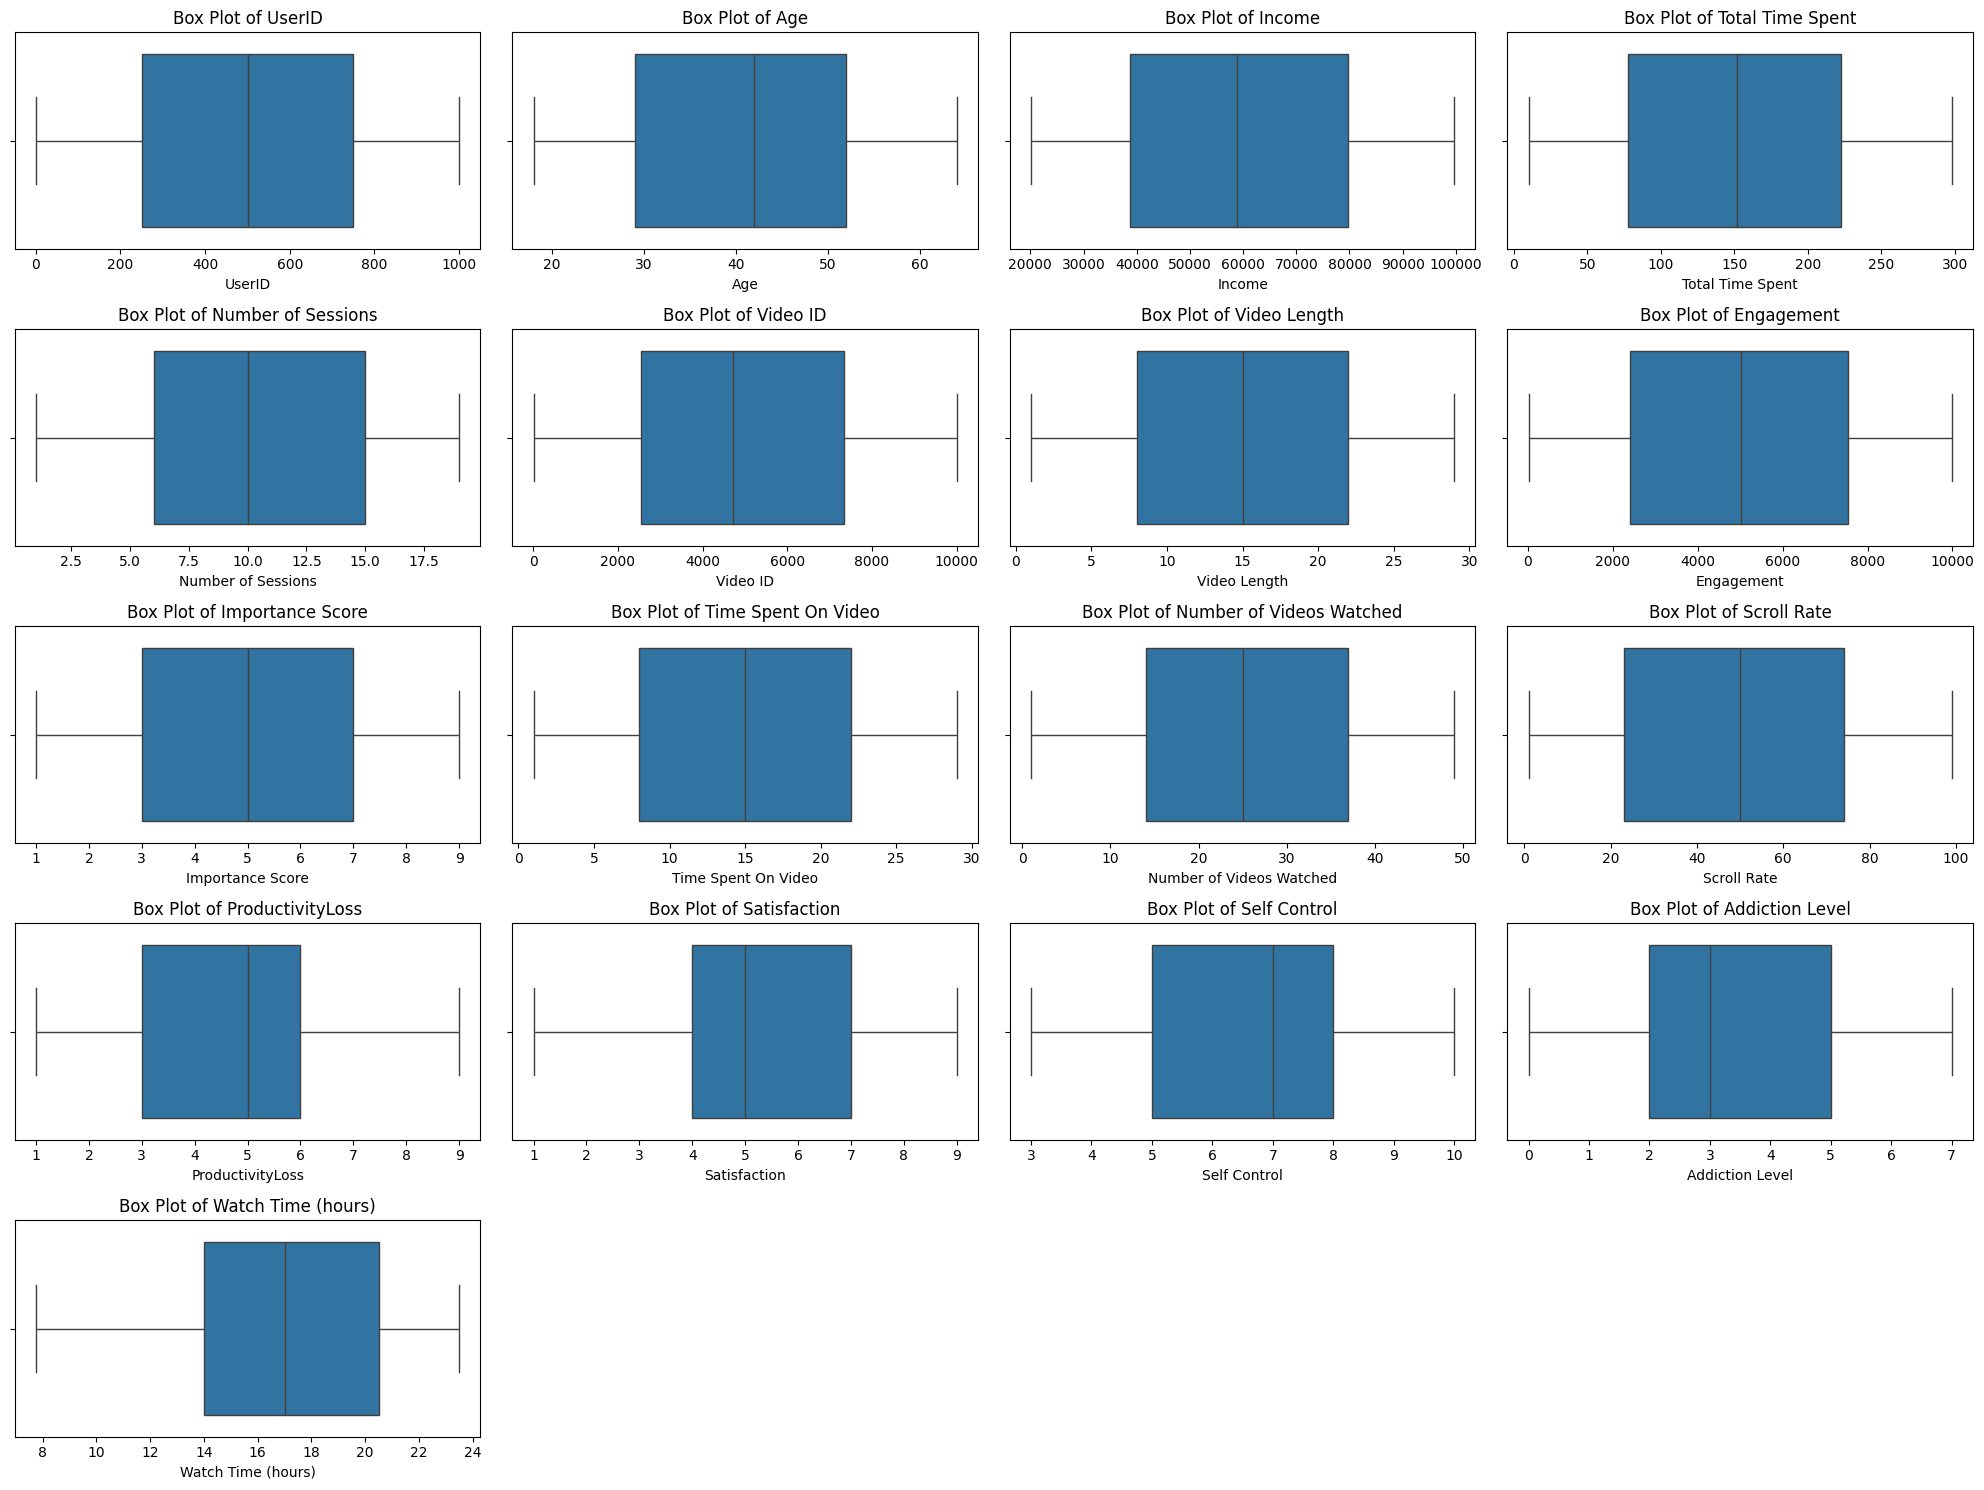

In [10]:
#Outlier Detection

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 4 + 1, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Data Interpretation

**Numerical Variables:**

Age, Income, Total Time Spent, etc.:

The average age of users is 41 years (minimum 18, maximum 64).
The mean income is 59,524, ranging from 20,138 to 99,676.
Average time spent on platforms is 151 minutes, with a minimum of 10 minutes and a maximum of 298 minutes.

**Dependency and Productivity Metrics:**

Average self-control level (Self Control) is 7.09, while addiction level (Addiction Level) is 2.9.
Productivity loss ranges from 1 to 9, with a mean of 5.13.

**Other Metrics:**

Number of Sessions: The average is 10 (minimum 1, maximum 19).
Video Length: The average length is 15 minutes, ranging from 1 to 29.


**Categorical Variables:**

Gender:

The majority of users are male (514 people, 51.4%).
Females make up approximately 486 users.

Location:

The top country is India (228 users), followed by 9 other locations.

Platform:

The most popular platform is TikTok (273 users).
Other platforms include Instagram, YouTube, and Facebook.

Video Category:

The leading category is Jokes/Memes (179 entries).

Usage Habits:

Most people watch in the evening (frequency: 365).
The most common reason for watching is Habit (339 entries).

Devices and Connections:

The most commonly used device is a smartphone with Android, and the primary connection type is mobile data.

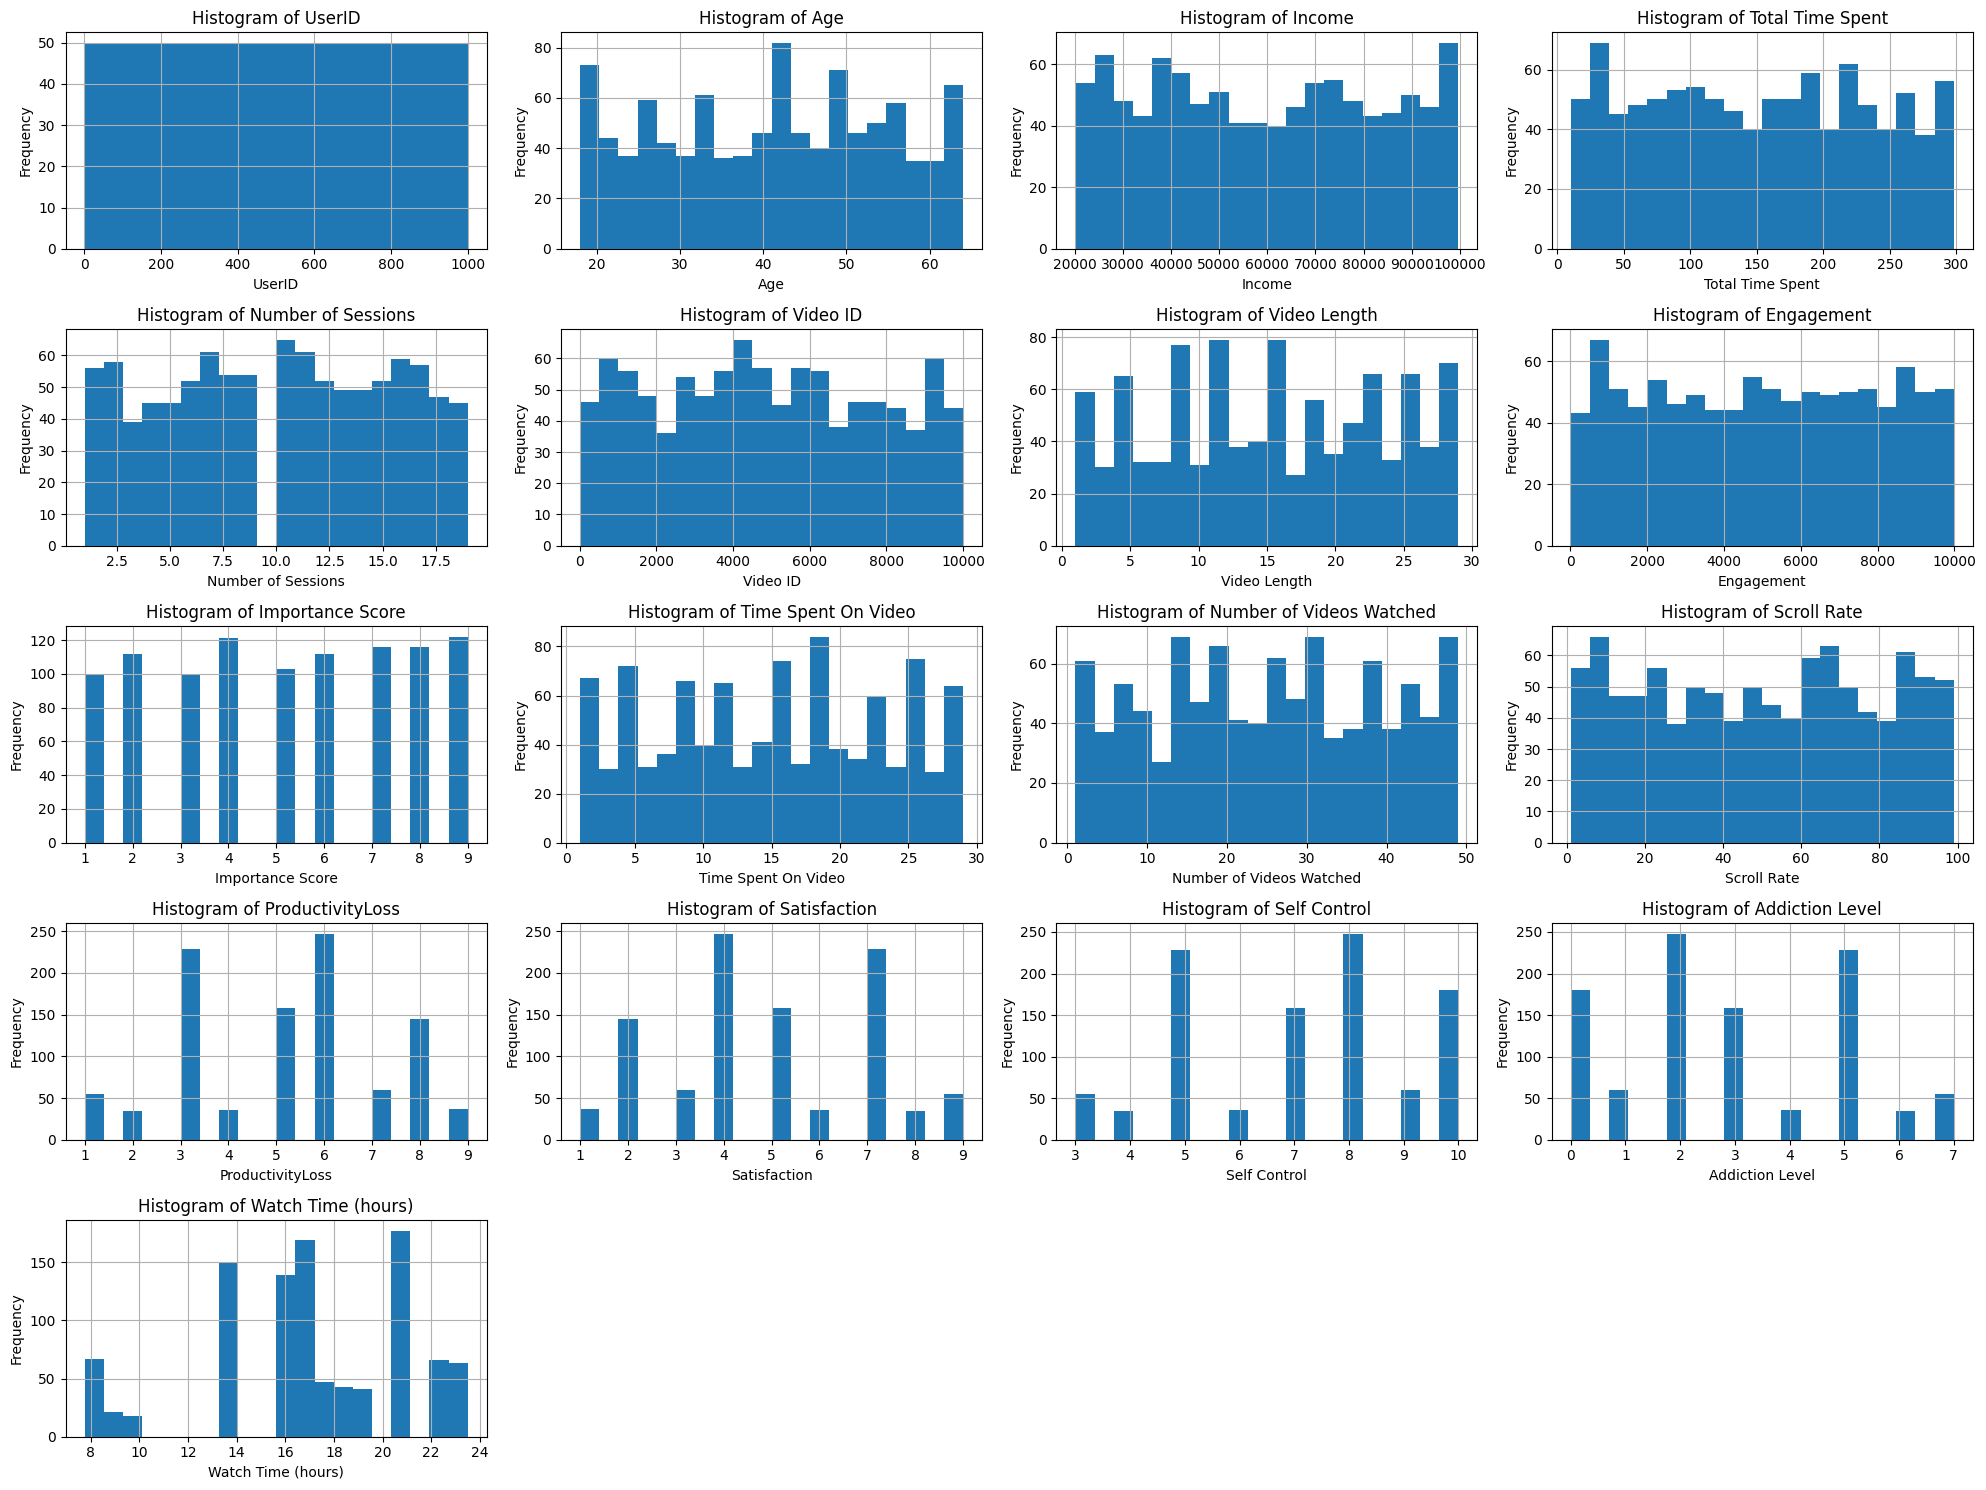

In [11]:
#Distribution Analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 4 + 1, 4, i)
    df[column].hist(bins=20)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

<ipython-input-12-f2c16aa77e7b>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-12-f2c16aa77e7b>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-12-f2c16aa77e7b>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-12-f2c16aa77e7b>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-12-f2c16aa77e7b>:5: FutureWarning: 

`shade` is now deprecated in fav

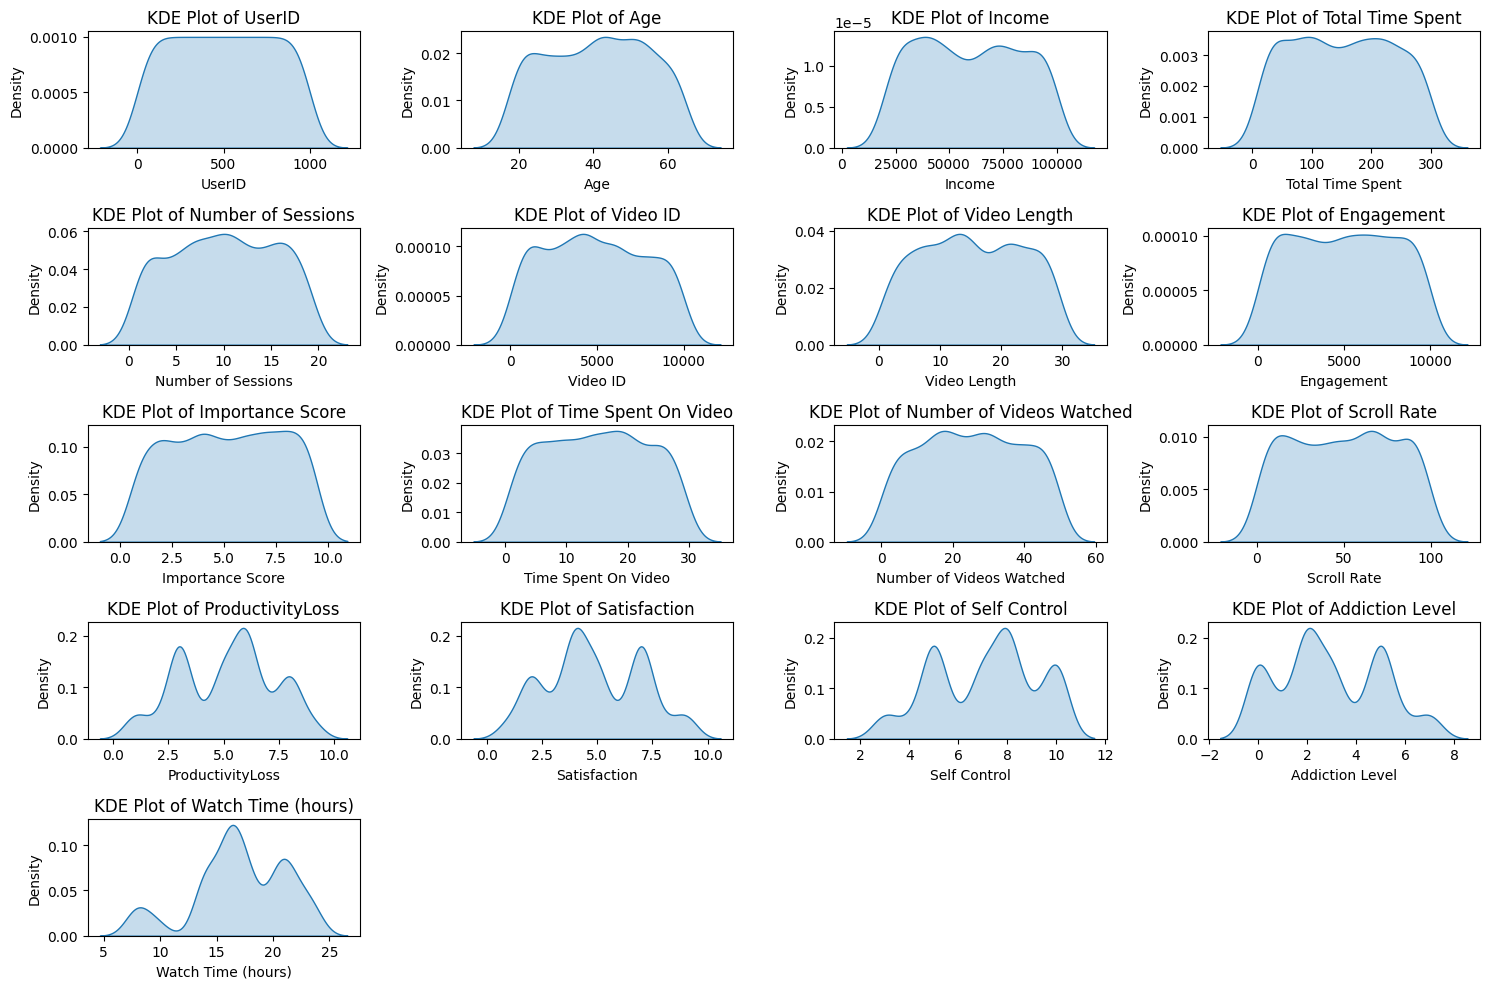

In [12]:
#KDE
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 4 + 1, 4, i)
    sns.kdeplot(df[column], shade=True)
    plt.title(f"KDE Plot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [13]:
skewness = df[numeric_columns].skew()
print(skewness)

UserID                      0.000000
Age                        -0.046883
Income                      0.047296
Total Time Spent            0.032217
Number of Sessions         -0.033686
Video ID                    0.068850
Video Length                0.000484
Engagement                  0.001805
Importance Score           -0.050892
Time Spent On Video        -0.003292
Number of Videos Watched   -0.000641
Scroll Rate                -0.017804
ProductivityLoss           -0.118186
Satisfaction                0.118186
Self Control               -0.219005
Addiction Level             0.219005
Watch Time (hours)         -0.535640
dtype: float64


Interpretation of Distribution Analysis:

Histograms and KDE Plots:

Most numerical variables show relatively symmetric distributions.
Some variables, such as ProductivityLoss, Satisfaction, Self Control, and Addiction Level, exhibit multimodal distributions (several peaks), which may indicate the presence of different groups in the data.

Skewness:

All skewness values are close to 0, indicating almost symmetric distributions.
The most noticeable skewness is observed in the following variables:
Satisfaction and Addiction Level (positive skewness).
Self Control (slightly negative skewness).
These skewness values are not critical, and the distributions appear well-balanced overall.

# Rethink the ProductivityLoss scale
The positive correlation between Productivity loss and Self-Control really looks illogical if we assumed that higher Self-Control should reduce ProductivityLoss. This may indicate an error in the interpretation of the scoring system for Productivity loss.

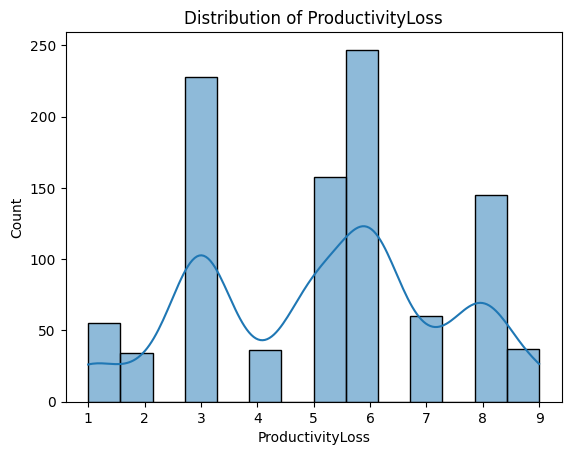

In [14]:
sns.histplot(df['ProductivityLoss'], kde=True)
plt.title('Distribution of ProductivityLoss')
plt.show()

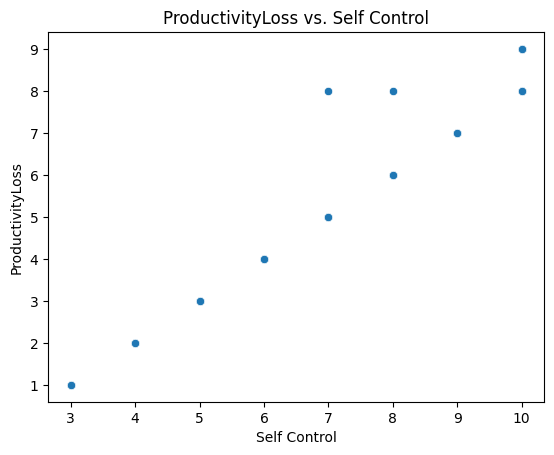

In [15]:
sns.scatterplot(x='Self Control', y='ProductivityLoss', data=df)
plt.title('ProductivityLoss vs. Self Control')
plt.show()

In [16]:
df['ProductivityLoss_transformed'] = 10 - df['ProductivityLoss']

# 2. CLUSTERIZATION

divide the data into groups for further analysis or making forecasts.

In [17]:
#Clustering or segmentation of users

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#data for clustarization
columns_to_cluster = ['ProductivityLoss_transformed', 'Satisfaction', 'Self Control', 'Addiction Level']
data_to_cluster = df[columns_to_cluster]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)



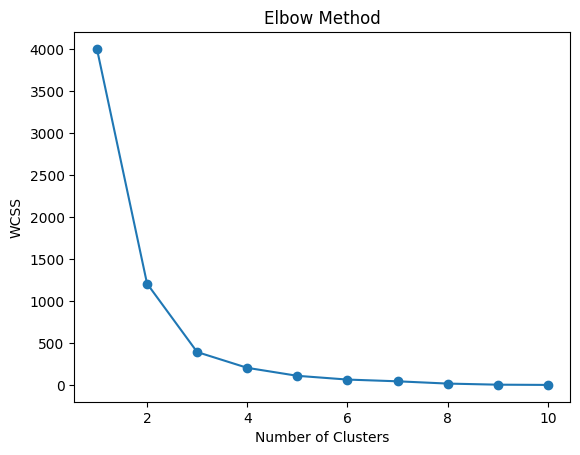

In [18]:
#Determining the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Visualization of the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Conducting clusterization
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [20]:
df['Cluster'].value_counts()

,count
Cluster,
2,406
0,353
1,241


In [21]:
cluster_analysis = df.groupby('Cluster')[columns_to_cluster].mean()
cluster_analysis

,ProductivityLoss_transformed,Satisfaction,Self Control,Addiction Level
Cluster,,,,
0,7.305949,7.305949,4.694051,5.305949
1,2.095436,2.095436,9.742739,0.257261
2,4.384236,4.384236,7.608374,2.391626



**Overall conclusion:**
The ProductivityLoss recalculation has made clusters more logical and interpretable.:

Cluster 0: High productivity, satisfaction, but highly dependent.

Cluster 1: High self-control with low productivity and satisfaction.

Cluster 2: Balanced users with moderate productivity and addiction.

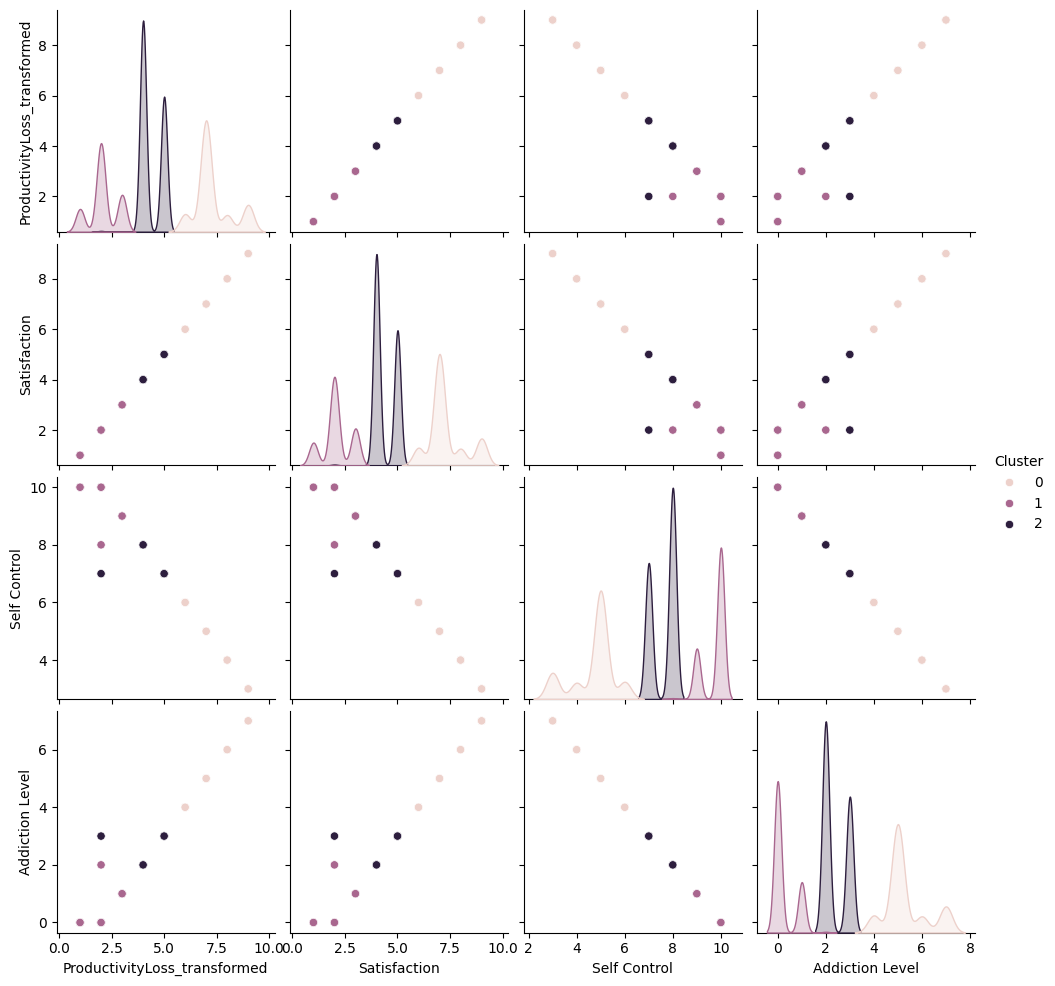

In [22]:
sns.pairplot(df, hue='Cluster', vars=columns_to_cluster)
plt.show()

# 3. ENCODING

In [23]:
categorical_columns = [
    'Gender', 'Location', 'Profession', 'Demographics', 'Platform',
    'Video Category', 'Frequency', 'Watch Reason', 'DeviceType', 'OS', 'CurrentActivity', 'ConnectionType'
]


for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Gender: ['Male' 'Female' 'Other']
Location: ['Pakistan' 'Mexico' 'United States' 'Barzil' 'Vietnam' 'India'
 'Indonesia' 'Philippines' 'Japan' 'Germany']
Profession: ['Engineer' 'Artist' 'Waiting staff' 'Manager' 'driver' 'Students'
 'Labor/Worker' 'Cashier' 'Teacher']
Demographics: ['Rural' 'Urban']
Platform: ['Instagram' 'Facebook' 'YouTube' 'TikTok']
Video Category: ['Pranks' 'Vlogs' 'Gaming' 'Jokes/Memes' 'Entertainment' 'ASMR'
 'Life Hacks' 'Trends' 'Comedy']
Frequency: ['Night' 'Afternoon' 'Evening' 'Morning']
Watch Reason: ['Procrastination' 'Habit' 'Entertainment' 'Boredom']
DeviceType: ['Smartphone' 'Computer' 'Tablet']
OS: ['Android' 'iOS' 'MacOS' 'Windows']
CurrentActivity: ['Commuting' 'At school' 'At home' 'At work']
ConnectionType: ['Mobile Data' 'Wi-Fi']


In [24]:
categorical_columns = [
    'Gender', 'Location', 'Profession', 'Demographics', 'Platform',
    'Video Category', 'Frequency', 'Watch Reason', 'DeviceType', 'OS', 'CurrentActivity', 'ConnectionType'
]

# Создаем закодированную копию DataFrame
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Проверяем результат
print(df_encoded.head())


   UserID  Age  Income   Debt  Owns Property  Total Time Spent  \
0       1   56   82812   True           True                80   
1       2   46   27999  False           True               228   
2       3   32   42436  False           True                30   
3       4   60   62963   True          False               101   
4       5   25   22096  False           True               136   

   Number of Sessions  Video ID  Video Length  Engagement  ...  OS_Android  \
0                  17      4229            24        7867  ...        True   
1                  14      2131            19        5944  ...        True   
2                   6      4367            19        8674  ...        True   
3                  19      1507             4        2477  ...        True   
4                   6      2159            19        3093  ...       False   

   OS_MacOS  OS_Windows  OS_iOS  CurrentActivity_At home  \
0     False       False   False                    False   
1     False   

In [25]:
quantitative_columns = [
    'UserID', 'Age', 'Income', 'Total Time Spent',
    'Number of Sessions', 'Video Length', 'Engagement',
    'ProductivityLoss_transformed', 'Satisfaction', 'Self Control', 'Addiction Level'
]


df_final_encoded = df_encoded.copy()
df_final_encoded [quantitative_columns] = df[quantitative_columns]

In [26]:
df_final_encoded.head()

,UserID,Age,Income,Debt,Owns Property,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,...,OS_Android,OS_MacOS,OS_Windows,OS_iOS,CurrentActivity_At home,CurrentActivity_At school,CurrentActivity_At work,CurrentActivity_Commuting,ConnectionType_Mobile Data,ConnectionType_Wi-Fi
0,1,56,82812,True,True,80,17,4229,24,7867,...,True,False,False,False,False,False,False,True,True,False
1,2,46,27999,False,True,228,14,2131,19,5944,...,True,False,False,False,False,True,False,False,False,True
2,3,32,42436,False,True,30,6,4367,19,8674,...,True,False,False,False,True,False,False,False,True,False
3,4,60,62963,True,False,101,19,1507,4,2477,...,True,False,False,False,False,False,False,True,True,False
4,5,25,22096,False,True,136,6,2159,19,3093,...,False,False,False,True,True,False,False,False,True,False


In [27]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   UserID                        1000 non-null   int64         
 1   Age                           1000 non-null   int64         
 2   Income                        1000 non-null   int64         
 3   Debt                          1000 non-null   bool          
 4   Owns Property                 1000 non-null   bool          
 5   Total Time Spent              1000 non-null   int64         
 6   Number of Sessions            1000 non-null   int64         
 7   Video ID                      1000 non-null   int64         
 8   Video Length                  1000 non-null   int64         
 9   Engagement                    1000 non-null   int64         
 10  Importance Score              1000 non-null   int64         
 11  Time Spent On Video           1

# 4. Correlation Matrix and Analysis

In [28]:
import plotly.express as px

In [29]:
#Find corr matrix
correlation_matrix = df_final_encoded.corr()


In [30]:
#Converting for plotly
correlation_matrix_reset = correlation_matrix.reset_index().melt(id_vars='index')
correlation_matrix_reset.columns = ['Variable1', 'Variable2', 'Correlation']

In [31]:
# Create matrix
fig = px.imshow(
    correlation_matrix,
    labels=dict(x="Features", y="Features", color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1
)

# Settings for better view
fig.update_layout(
    title="Correlation Matrix",
    xaxis=dict(tickangle=45, side='top'),
    yaxis=dict(autorange='reversed'),
    width=1000,
    height=1000
)

fig.show()

In [32]:
#analyze strong corr

correlation_threshold = 0.6

strong_correlations = correlation_matrix.where(
    abs(correlation_matrix) > correlation_threshold
).stack().reset_index()

# clear reapited and self corr
strong_correlations.columns = ['Variable1', 'Variable2', 'Correlation']
strong_correlations = strong_correlations[strong_correlations['Variable1'] != strong_correlations['Variable2']]

#clear pairs
strong_correlations['Pair'] = strong_correlations.apply(
    lambda row: tuple(sorted([row['Variable1'], row['Variable2']])), axis=1
)

strong_correlations = strong_correlations.drop_duplicates(subset='Pair').drop(columns='Pair')

strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False)
print(strong_correlations)

                      Variable1                     Variable2  Correlation
35                   Watch Time            Watch Time (hours)     1.000000
29                 Satisfaction  ProductivityLoss_transformed     1.000000
52              Addiction Level  ProductivityLoss_transformed     0.994939
27                 Satisfaction               Addiction Level     0.994939
19             ProductivityLoss                  Self Control     0.994939
3                        Income                          Debt     0.850111
61           Watch Time (hours)               Frequency_Night     0.752254
38                   Watch Time               Frequency_Night     0.752254
59           Watch Time (hours)  ProductivityLoss_transformed     0.630249
28                 Satisfaction            Watch Time (hours)     0.630249
25                 Satisfaction                    Watch Time     0.630249
36                   Watch Time  ProductivityLoss_transformed     0.630249
51              Addiction

1. Strong Positive Correlations:

ProductivityLoss_transformed and Satisfaction (1.000):

Higher productivity is directly linked to higher satisfaction, which confirms logical expectations.
ProductivityLoss_transformed and Addiction Level (0.994):

Increased addiction level correlates with higher productivity (transformed metric). This could suggest that addiction, in some cases, might drive productivity, though this may warrant further investigation.
Satisfaction and Addiction Level (0.994):

Higher satisfaction appears to align with higher addiction, which might indicate that users feel engaged or satisfied when they are highly immersed in platforms.

2. Strong Negative Correlations:

Self Control and Addiction Level (-1.000):

As expected, higher self-control is associated with lower addiction levels.
Self Control and ProductivityLoss_transformed (-0.994):

Users with greater self-control experience lower productivity losses, reinforcing the critical role of self-discipline.
ProductivityLoss and Satisfaction (-1.000):

Loss of productivity significantly reduces satisfaction, suggesting productivity as a strong driver of user happiness.

3. Behavioral Patterns (Moderate Correlations):

Watch Time and Addiction Level (0.628):

Users spending more time on platforms tend to exhibit higher addiction levels, reinforcing the role of excessive usage as a driver of dependency.
Watch Time and Self Control (-0.628):

Extended watch times are inversely correlated with self-control, suggesting that users spending excessive time on platforms may struggle with regulating their usage.
Frequency_Night and Watch Time (0.752):

Users who consume content at night tend to spend more time on platforms, highlighting potential at-risk behaviors for nighttime consumption.

4. Categorical Dependencies:

DeviceType_Smartphone vs. DeviceType_Tablet (-0.746):

Users tend to prefer one device type over another, with smartphones being dominant.
ConnectionType_Mobile Data and ConnectionType_Wi-Fi (-1.000):

These categories are mutually exclusive, but insights can be drawn about device and connection preferences (e.g., mobility vs. home usage).
Demographics_Rural and Demographics_Urban (-1.000):

Clear segregation between rural and urban users may influence platform behavior and content consumption.


In [33]:
from scipy.stats import pearsonr, spearmanr


# Functiun to undestand the corr
def calculate_significant_correlations(df_final_encoded, method='pearson'):
    numeric_df = df_final_encoded.select_dtypes(include=['number'])
    correlation_results = []

    # Take all pairs
    for i, col1 in enumerate(numeric_df.columns):
        for col2 in numeric_df.columns[i+1:]:  # Избегаем повторений и само-корреляции
            if method == 'pearson':
                corr, p_value = pearsonr(numeric_df[col1], numeric_df[col2])
            elif method == 'spearman':
                corr, p_value = spearmanr(numeric_df[col1], numeric_df[col2])
            else:
                raise ValueError("Method must be 'pearson' or 'spearman'")

            # Safe the results
            correlation_results.append({
                    'Variable1': col1,
                    'Variable2': col2,
                    'Correlation': corr,
                    'P-value': p_value
                })

    # ПTransrorm to df
    results_df = pd.DataFrame(correlation_results)

    # Filter only (p-value < 0.05)
    significant_results = results_df[results_df['P-value'] < 0.05]

    return significant_results.sort_values(by='Correlation', ascending=False)

#
significant_correlations = calculate_significant_correlations(df_final_encoded, method='pearson')
significant_correlations

,Variable1,Variable2,Correlation,P-value
159,Satisfaction,ProductivityLoss_transformed,1.000000,0.000000e+00
157,Satisfaction,Addiction Level,0.994939,0.000000e+00
166,Addiction Level,ProductivityLoss_transformed,0.994939,0.000000e+00
151,ProductivityLoss,Self Control,0.994939,0.000000e+00
158,Satisfaction,Watch Time (hours),0.630249,8.011297e-112
168,Watch Time (hours),ProductivityLoss_transformed,0.630249,8.011297e-112
165,Addiction Level,Watch Time (hours),0.628763,3.770476e-111
164,Self Control,Cluster,0.590232,6.539671e-95
155,ProductivityLoss,Cluster,0.572917,2.662239e-88
11,UserID,ProductivityLoss,0.117922,1.859365e-04


In [34]:
def group_correlations(significant_correlations):
    # |corr| > 0.8
    strong_corr = significant_correlations[(significant_correlations['Correlation'] > 0.8) |
                                            (significant_correlations['Correlation'] < -0.8)]

    # 0.5 < |corr| <= 0.8
    medium_corr = significant_correlations[(significant_correlations['Correlation'] > 0.5) &
                                           (significant_correlations['Correlation'] <= 0.8) |
                                           (significant_correlations['Correlation'] < -0.5) &
                                           (significant_correlations['Correlation'] >= -0.8)]

    #  |corr| <= 0.5
    weak_corr = significant_correlations[(significant_correlations['Correlation'] >= -0.5) &
                                         (significant_correlations['Correlation'] <= 0.5)]

    return strong_corr, medium_corr, weak_corr


strong_corr, medium_corr, weak_corr = group_correlations(significant_correlations)


print("Strong Correlations:")
print(strong_corr)

print("\nMedium Correlations:")
print(medium_corr)

print("\nWeak Correlations:")
print(weak_corr)

Strong Correlations:
            Variable1                     Variable2  Correlation  P-value
159      Satisfaction  ProductivityLoss_transformed     1.000000      0.0
157      Satisfaction               Addiction Level     0.994939      0.0
166   Addiction Level  ProductivityLoss_transformed     0.994939      0.0
151  ProductivityLoss                  Self Control     0.994939      0.0
163      Self Control  ProductivityLoss_transformed    -0.994939      0.0
156      Satisfaction                  Self Control    -0.994939      0.0
152  ProductivityLoss               Addiction Level    -0.994939      0.0
161      Self Control               Addiction Level    -1.000000      0.0
154  ProductivityLoss  ProductivityLoss_transformed    -1.000000      0.0
150  ProductivityLoss                  Satisfaction    -1.000000      0.0

Medium Correlations:
                        Variable1                     Variable2  Correlation  \
158                  Satisfaction            Watch Time (hours)

In [35]:
#delete not informative pairs
medium_corr = medium_corr[
    (medium_corr['Variable1'] != 'Cluster') & (medium_corr['Variable2'] != 'Cluster')
]
weak_corr = weak_corr[
    (weak_corr['Variable1'] != 'UserID') & (weak_corr['Variable2'] != 'UserID')
]

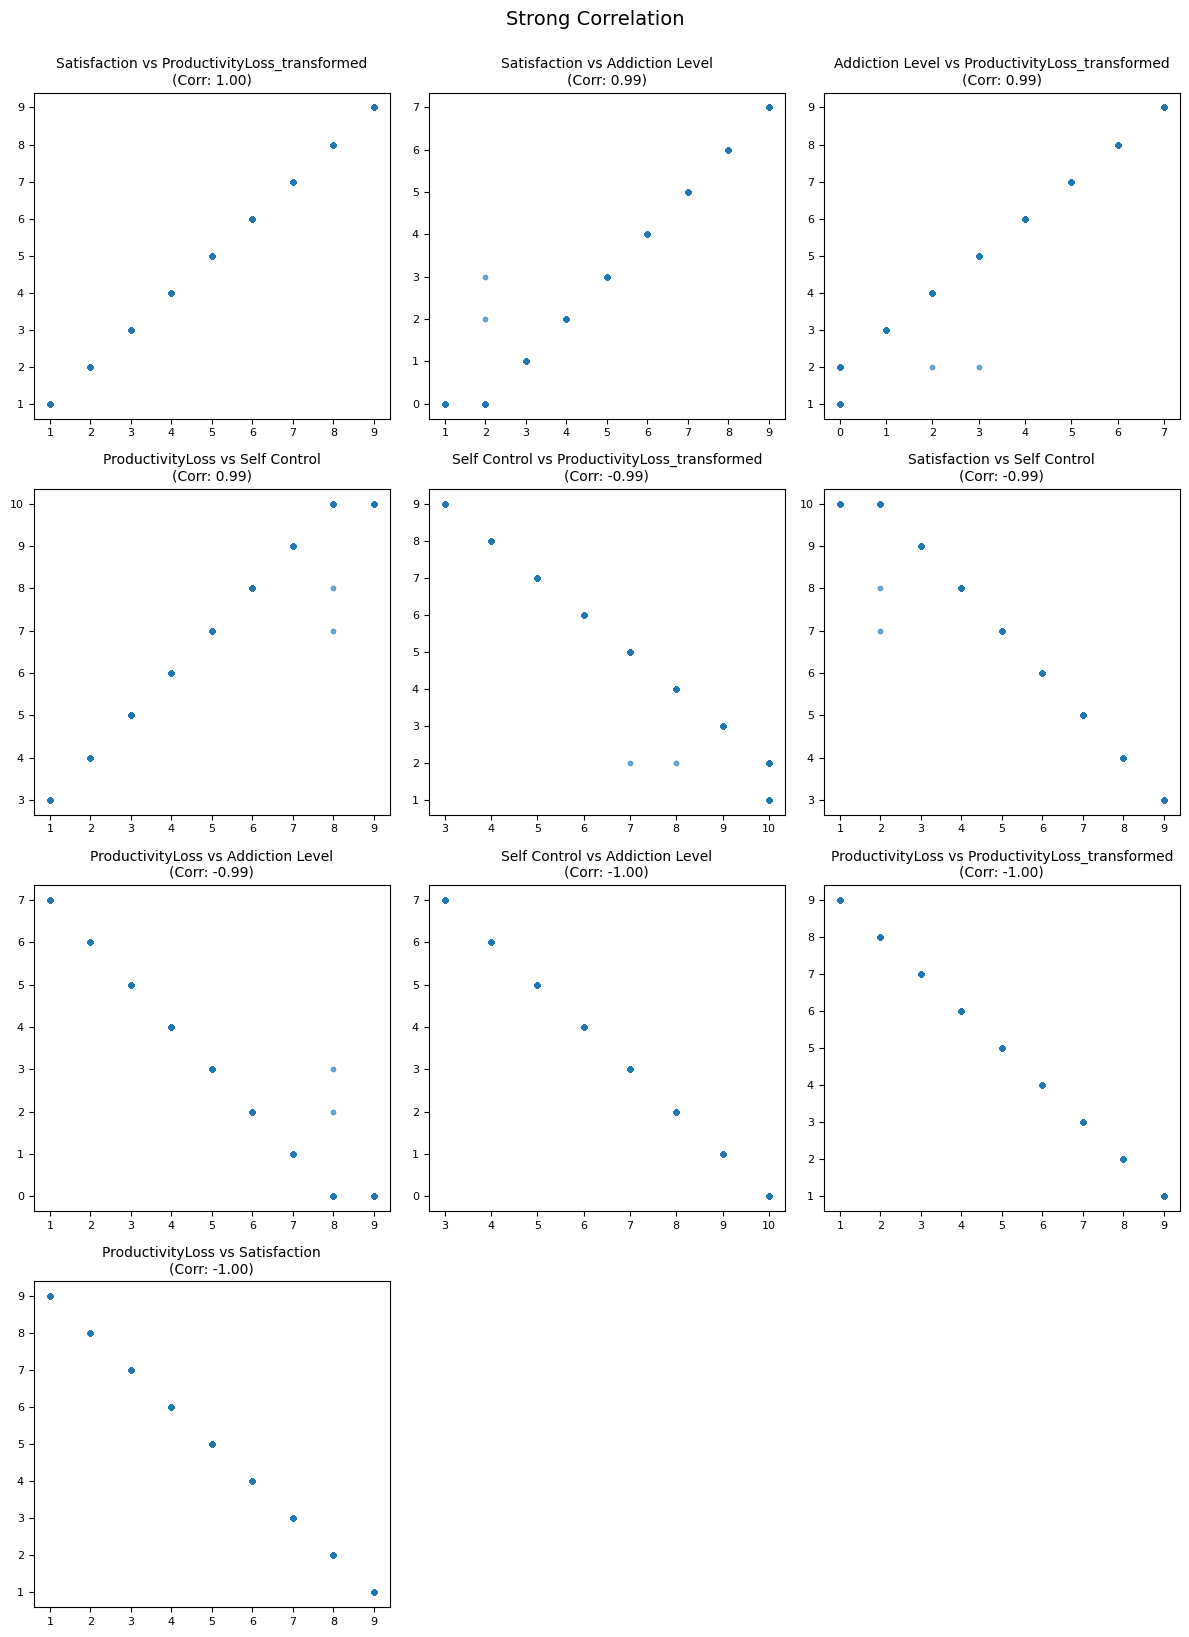

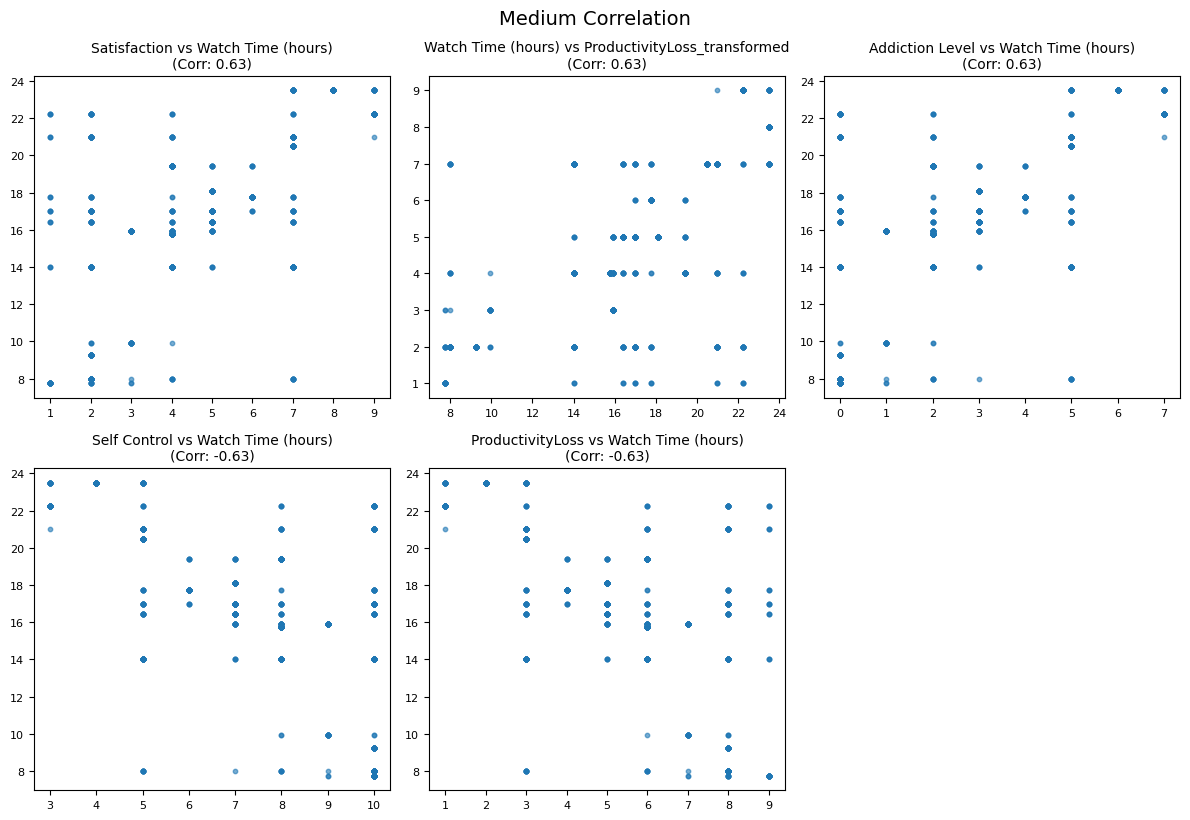

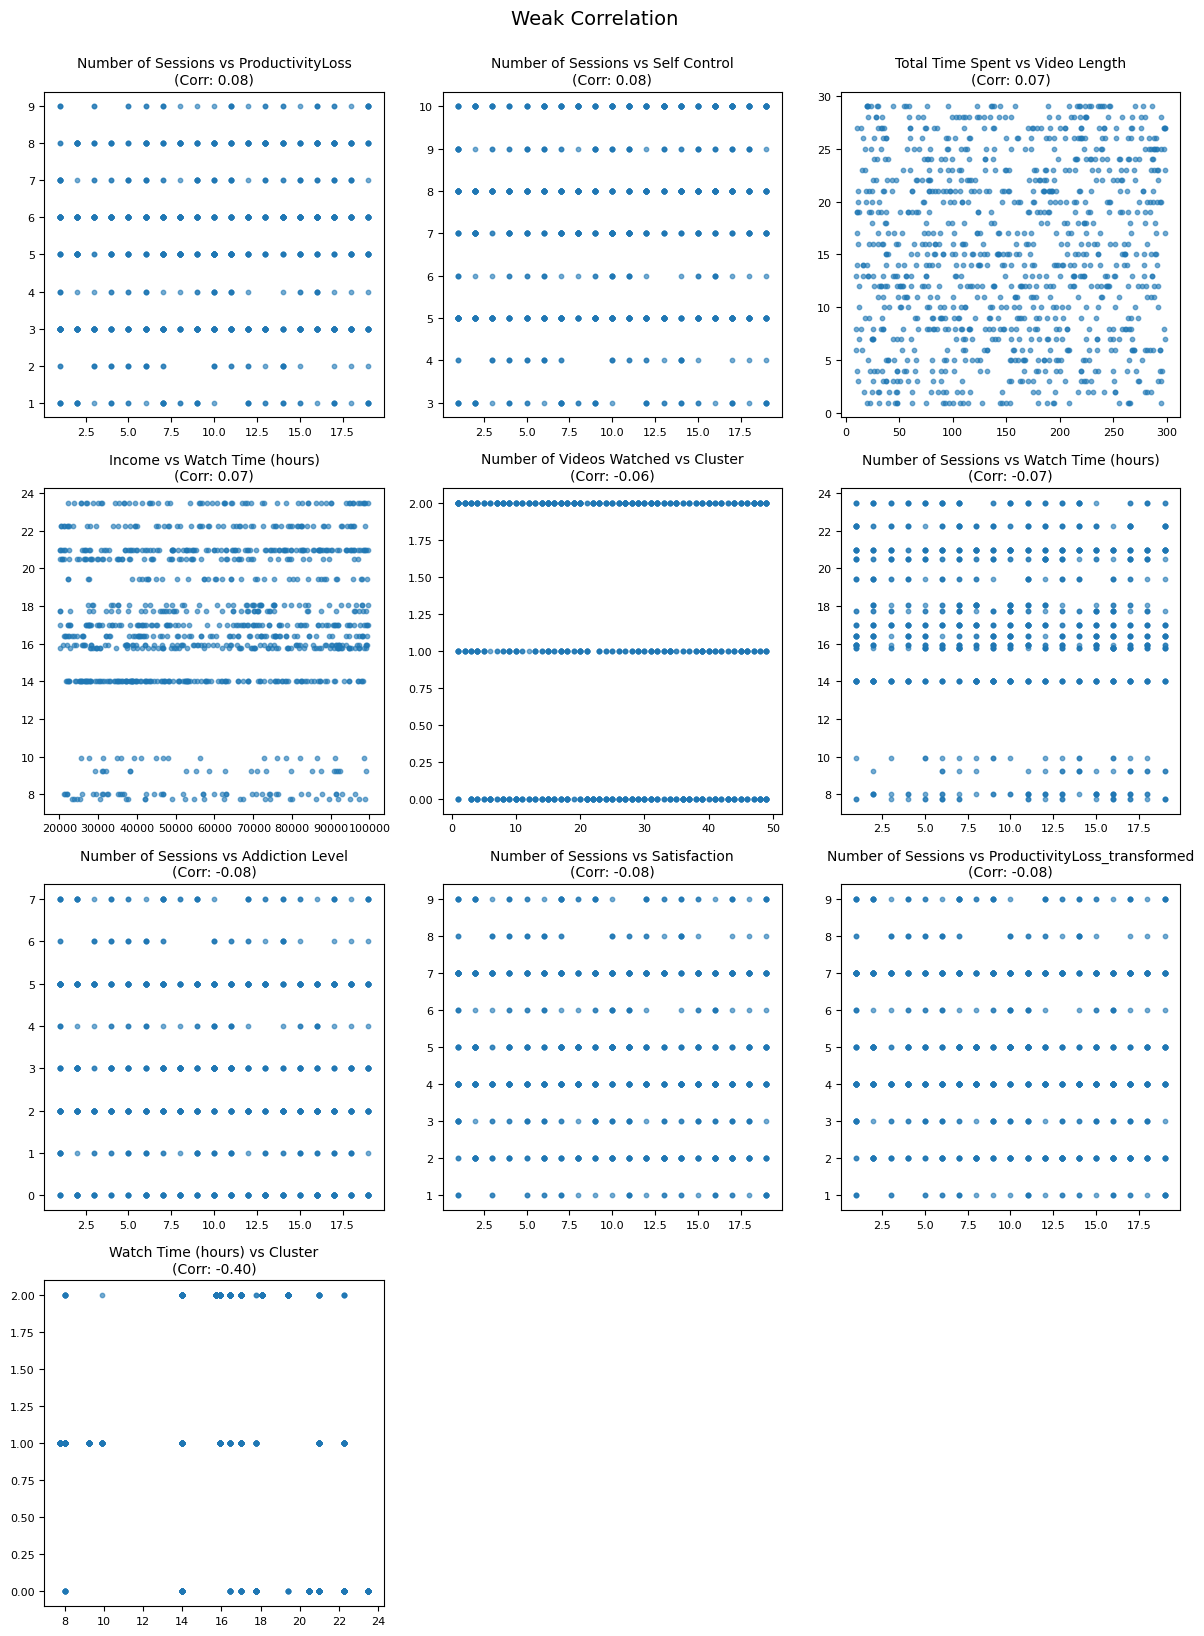

In [36]:
def plot_compact_scatter(correlations, group_name, data, n_cols=3):
    """
    Компактная визуализация диаграмм рассеяния для каждой пары переменных из группы.

    correlations: DataFrame с колонками 'Variable1', 'Variable2', 'Correlation'
    group_name: Название группы (для заголовка)
    data: DataFrame с данными переменных
    n_cols: Количество столбцов в сетке
    """
    n_plots = len(correlations)
    n_rows = (n_plots // n_cols) + (n_plots % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    axes = axes.flatten()  # Преобразуем оси в одномерный массив для итерации

    for i, row in enumerate(correlations.itertuples()):
        var1, var2 = row.Variable1, row.Variable2
        if var1 in data.columns and var2 in data.columns:
            axes[i].scatter(data[var1], data[var2], alpha=0.6, s=10)
            axes[i].set_title(f"{var1} vs {var2}\n(Corr: {row.Correlation:.2f})", fontsize=10)
            axes[i].tick_params(labelsize=8)
        else:
            axes[i].axis('off')  # Если данных нет, убираем лишние графики

    # Убираем лишние оси, если графиков меньше, чем ячеек
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.suptitle(group_name, y=1.02, fontsize=14)
    plt.show()

# Построение графиков для каждой группы
plot_compact_scatter(strong_corr, "Strong Correlation", df_final_encoded)
plot_compact_scatter(medium_corr, "Medium Correlation", df_final_encoded)
plot_compact_scatter(weak_corr, "Weak Correlation", df_final_encoded)

Overall Insights:

Redundant Variables:

Variables with perfect correlations (+1 or -1) often duplicate each other. For instance, Satisfaction and ProductivityLoss_transformed.


Impact of Usage Time:

The relationship between Watch Time (hours) and other metrics like satisfaction and self-control highlights the importance of analyzing user behavior.

Self-Control as a Key Factor:

Self-control significantly impacts both addiction and productivity, as demonstrated by strong negative correlations (e.g., with Addiction Level).

Weak Correlations:

Variables in the weak group have little influence on results, making their practical significance minimal.

# 5. Demographic Analysis

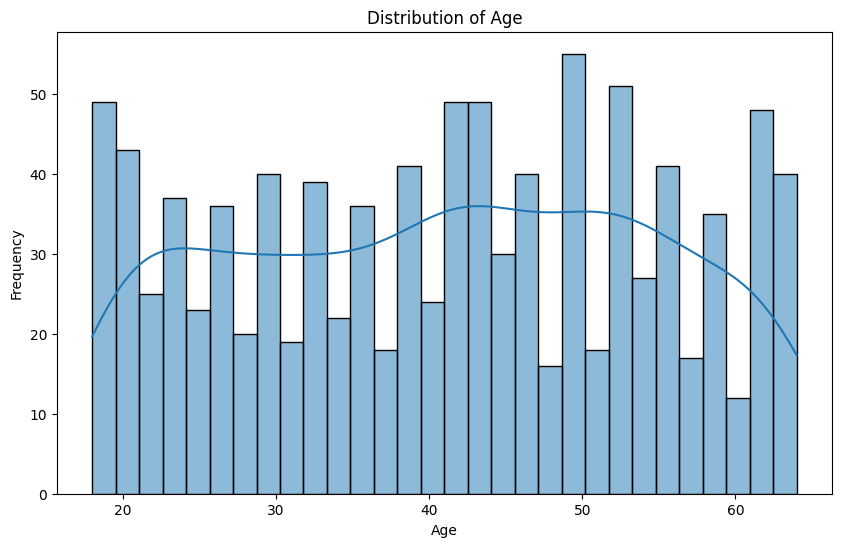

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-38-bcde00cc574e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




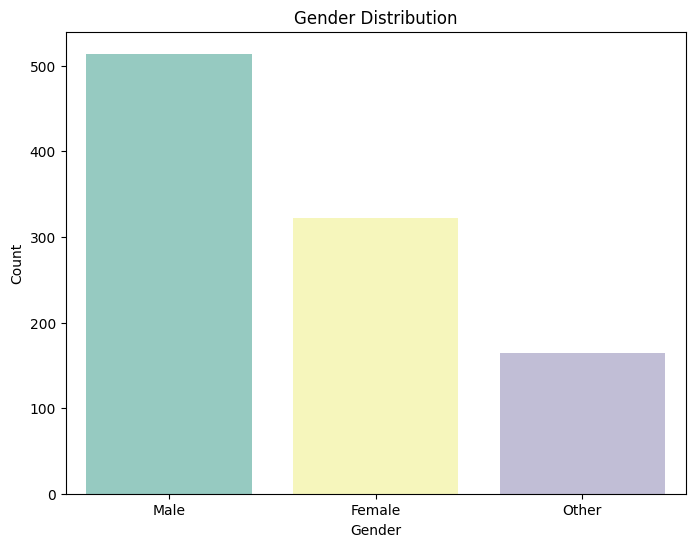

In [38]:
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set3')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-39-7533f7840bc7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




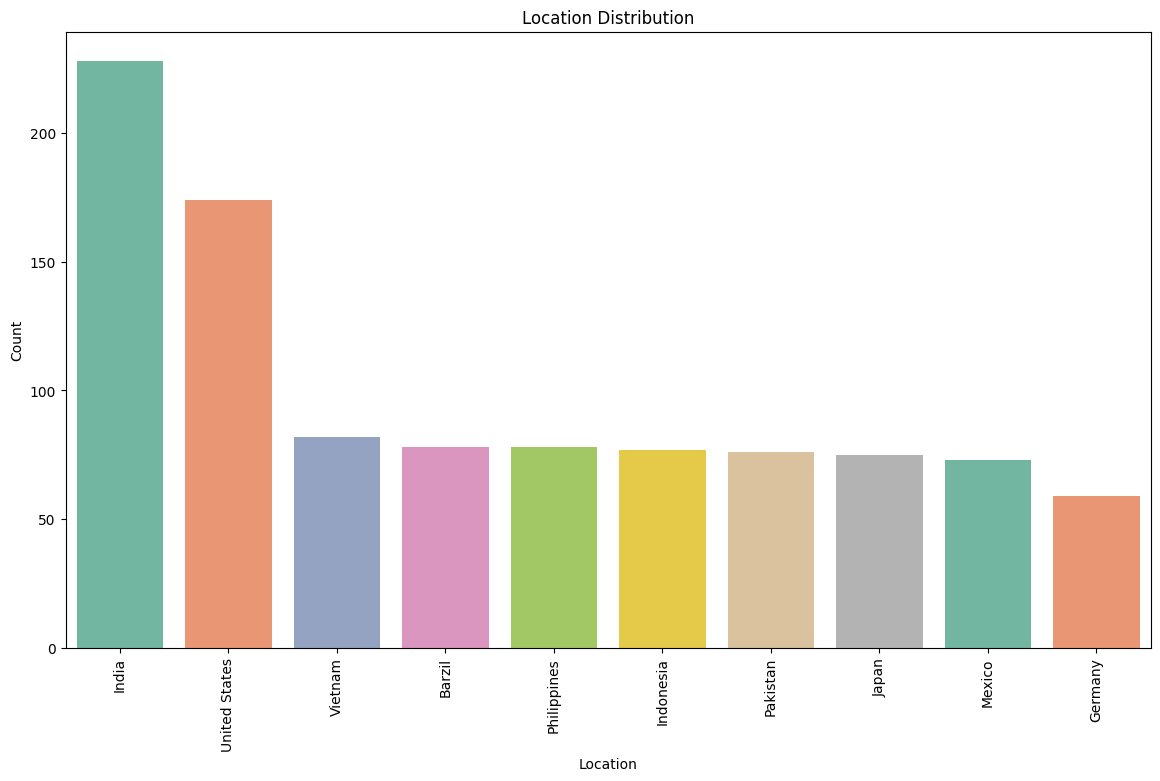

In [39]:
plt.figure(figsize=(14, 8))
location_counts = df['Location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts.values, palette='Set2')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<ipython-input-40-d308fdcb395e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




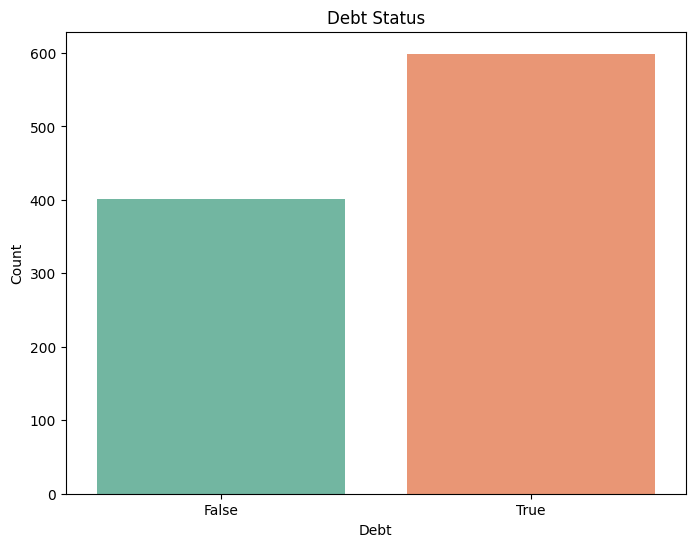

In [40]:
plt.figure(figsize=(8, 6))
debt_counts = df['Debt'].value_counts()
sns.barplot(x=debt_counts.index, y=debt_counts.values, palette='Set2')
plt.title('Debt Status')
plt.xlabel('Debt')
plt.ylabel('Count')
plt.show()

<ipython-input-41-a7031398a31b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




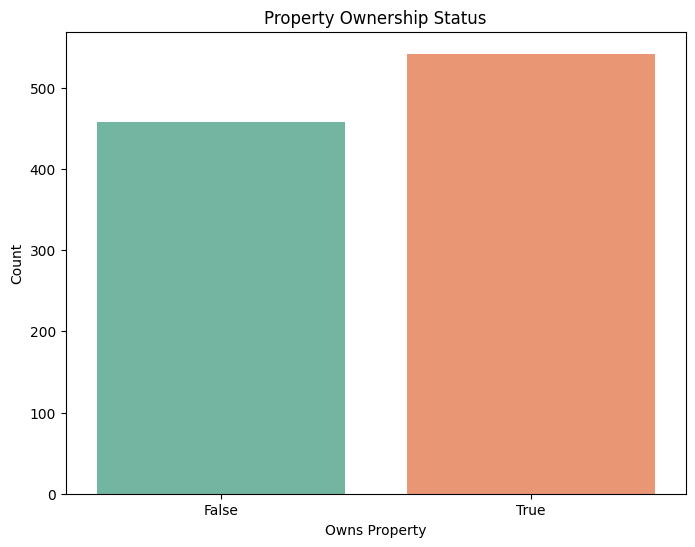

In [41]:
plt.figure(figsize=(8, 6))
property_counts = df['Owns Property'].value_counts()
sns.barplot(x=property_counts.index, y=property_counts.values, palette='Set2')
plt.title('Property Ownership Status')
plt.xlabel('Owns Property')
plt.ylabel('Count')
plt.show()

<ipython-input-42-ff10ec9db941>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




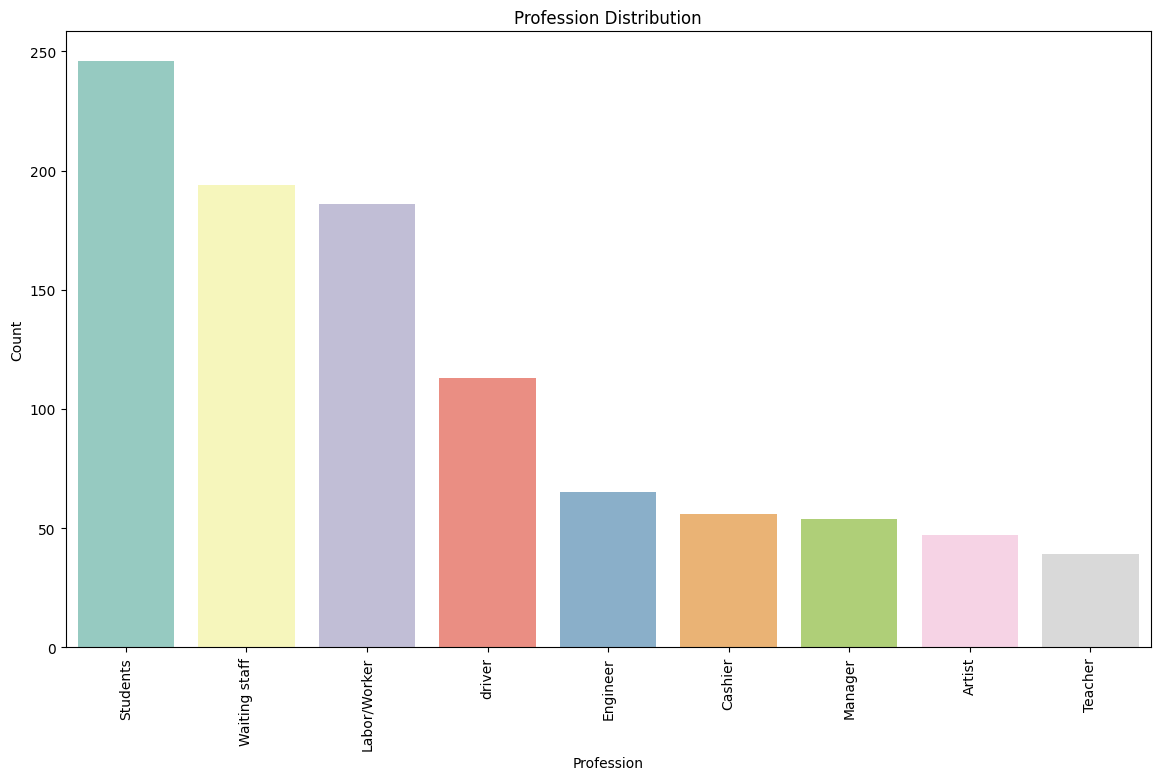

In [42]:
plt.figure(figsize=(14, 8))
profession_counts = df['Profession'].value_counts()
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='Set3')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 6. Analysis of demographic differences (Stat)

In [43]:
# GENDER
# H0: The average platform usage (Total Time Spent) is the same for males, females, and other genders.
# H1: The average platform usage differs between gender groups.
# ANOVA: Comparing Total Time Spent between the gender
from scipy.stats import f_oneway

In [44]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,Watch Time (hours),ProductivityLoss_transformed,Cluster
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,Smartphone,Android,1900-01-01 21:00:00,5,5,Commuting,Mobile Data,21.0,7,0
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,Computer,Android,1900-01-01 17:00:00,7,3,At school,Wi-Fi,17.0,5,2
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,Tablet,Android,1900-01-01 14:00:00,8,2,At home,Mobile Data,14.0,4,2
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,Smartphone,Android,1900-01-01 21:00:00,5,5,Commuting,Mobile Data,21.0,7,0
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,Smartphone,iOS,1900-01-01 08:00:00,10,0,At home,Mobile Data,8.0,2,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   UserID                        1000 non-null   int64         
 1   Age                           1000 non-null   int64         
 2   Gender                        1000 non-null   object        
 3   Location                      1000 non-null   object        
 4   Income                        1000 non-null   int64         
 5   Debt                          1000 non-null   bool          
 6   Owns Property                 1000 non-null   bool          
 7   Profession                    1000 non-null   object        
 8   Demographics                  1000 non-null   object        
 9   Platform                      1000 non-null   object        
 10  Total Time Spent              1000 non-null   int64         
 11  Number of Sessions            1

In [46]:
variables_to_check = ['Total Time Spent', 'Engagement', 'Addiction Level',
                      'ProductivityLoss_transformed', 'Satisfaction', 'Self Control']
for var in variables_to_check:
    anova_gender = f_oneway(
        df[df['Gender'] == 'Male'][var],
        df[df['Gender'] == 'Female'][var],
        df[df['Gender'] == 'Other'][var]
    )
    print(f"ANOVA for {var} by Gender: F-statistic={anova_gender.statistic:.2f}, P-value={anova_gender.pvalue:.4f}")

ANOVA for Total Time Spent by Gender: F-statistic=0.38, P-value=0.6807
ANOVA for Engagement by Gender: F-statistic=0.77, P-value=0.4615
ANOVA for Addiction Level by Gender: F-statistic=0.88, P-value=0.4135
ANOVA for ProductivityLoss_transformed by Gender: F-statistic=0.71, P-value=0.4901
ANOVA for Satisfaction by Gender: F-statistic=0.71, P-value=0.4901
ANOVA for Self Control by Gender: F-statistic=0.88, P-value=0.4135


All p-values are greater than 0.05, indicating that the mean values of these metrics do not differ between the groups Male, Female, and Other.
The F-statistic also points to weak variance between the groups.
Conclusion: Gender does not have a significant effect on platform usage, engagement, dependency, productivity, satisfaction, or self-control.

In [47]:
#AGE
# H0: The average platform usage does not depend on the age group.
# H1: The average platform usage depends on the age group.

df_age = df.copy()



In [48]:
bins = [18, 25, 40, 55, 65]
labels = ['18-25', '26-40', '41-55', '56+']

df_age['Age Group'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)

In [49]:
from scipy.stats import f_oneway


variables_to_check = ['Total Time Spent', 'Engagement', 'Addiction Level',
                      'ProductivityLoss_transformed', 'Satisfaction', 'Self Control']

for var in variables_to_check:
    anova_age = f_oneway(
        *[df_age[df_age['Age Group'] == group][var] for group in labels]
    )
    print(f"ANOVA for {var} by Age Group: F-statistic={anova_age.statistic:.2f}, P-value={anova_age.pvalue:.4f}")

ANOVA for Total Time Spent by Age Group: F-statistic=0.51, P-value=0.6724
ANOVA for Engagement by Age Group: F-statistic=0.90, P-value=0.4397
ANOVA for Addiction Level by Age Group: F-statistic=1.53, P-value=0.2044
ANOVA for ProductivityLoss_transformed by Age Group: F-statistic=1.22, P-value=0.3020
ANOVA for Satisfaction by Age Group: F-statistic=1.22, P-value=0.3020
ANOVA for Self Control by Age Group: F-statistic=1.53, P-value=0.2044


All p-values are greater than 0.05, indicating that differences in mean values between age groups (18-25, 26-40, 41-55, 56+) are not statistically significant.
Although Addiction Level and Self-Control have slightly lower p-values (around 0.20), they are still above the significance threshold (0.05).
Conclusion: Age groups also do not show significant differences in platform usage, engagement, dependency, productivity, satisfaction, or self-control.

In [50]:
anova_income_gender = f_oneway(
    df[df['Gender'] == 'Male']['Income'],
    df[df['Gender'] == 'Female']['Income'],
    df[df['Gender'] == 'Other']['Income']
)

print(f"ANOVA for Income by Gender: F-statistic={anova_income_gender.statistic:.2f}, P-value={anova_income_gender.pvalue:.4f}")

anova_income_age = f_oneway(
    *[df_age[df_age['Age Group'] == group]['Income'] for group in df_age['Age Group'].unique()]
)

print(f"ANOVA for Income by Age Group: F-statistic={anova_income_age.statistic:.2f}, P-value={anova_income_age.pvalue:.4f}")

ANOVA for Income by Gender: F-statistic=1.90, P-value=0.1495
ANOVA for Income by Age Group: F-statistic=0.16, P-value=0.9214


In [51]:
#Division into Income Groups:

bins = [0, 30000, 60000, df['Income'].max()]
labels = ['Low', 'Medium', 'High']
df_income = df.copy()
df_income['Income Group'] = pd.cut(df_income['Income'], bins=bins, labels=labels)


print(df_income['Income Group'].value_counts())

Income Group
High      492
Medium    369
Low       139
Name: count, dtype: int64


In [52]:
variables_to_check = ['Total Time Spent', 'Engagement', 'Addiction Level',
                      'ProductivityLoss_transformed', 'Satisfaction', 'Self Control']

for var in variables_to_check:
    anova_income = f_oneway(
        *[df_income[df_income['Income Group'] == group][var] for group in df_income['Income Group'].unique()]
    )
    print(f"{var} for Income: F-statistic={anova_income.statistic:.2f}, P-value={anova_income.pvalue:.4f}")

Total Time Spent for Income: F-statistic=0.97, P-value=0.3794
Engagement for Income: F-statistic=0.28, P-value=0.7561
Addiction Level for Income: F-statistic=2.96, P-value=0.0521
ProductivityLoss_transformed for Income: F-statistic=3.20, P-value=0.0412
Satisfaction for Income: F-statistic=3.20, P-value=0.0412
Self Control for Income: F-statistic=2.96, P-value=0.0521


In [53]:
# Diff analysis DEBT
from scipy.stats import ttest_ind
for var in variables_to_check:
    ttest_debt = ttest_ind(
        df[df['Debt'] == True][var],
        df[df['Debt'] == False][var]
    )
    print(f"{var} and Debt: T-statistic={ttest_debt.statistic:.2f}, P-value={ttest_debt.pvalue:.4f}")


Total Time Spent and Debt: T-statistic=-0.60, P-value=0.5480
Engagement and Debt: T-statistic=-0.45, P-value=0.6525
Addiction Level and Debt: T-statistic=-1.65, P-value=0.0986
ProductivityLoss_transformed and Debt: T-statistic=-1.60, P-value=0.1103
Satisfaction and Debt: T-statistic=-1.60, P-value=0.1103
Self Control and Debt: T-statistic=1.65, P-value=0.0986


In [54]:
#Demographic analysis

for var in variables_to_check:
    ttest_demo = ttest_ind(
        df[df['Demographics'] == 'Rural'][var],
        df[df['Demographics'] == 'Urban'][var]
    )
    print(f"{var} and Demographics: T-statistic={ttest_demo.statistic:.2f}, P-value={ttest_demo.pvalue:.4f}")

Total Time Spent and Demographics: T-statistic=1.76, P-value=0.0791
Engagement and Demographics: T-statistic=-0.92, P-value=0.3571
Addiction Level and Demographics: T-statistic=0.32, P-value=0.7476
ProductivityLoss_transformed and Demographics: T-statistic=0.19, P-value=0.8520
Satisfaction and Demographics: T-statistic=0.19, P-value=0.8520
Self Control and Demographics: T-statistic=-0.32, P-value=0.7476


In [55]:
# ANOVA for Location
for var in variables_to_check:
    anova_location = f_oneway(
        *[df[df['Location'] == loc][var] for loc in df['Location'].unique()]
    )
    print(f"{var} for Location: F-statistic={anova_location.statistic:.2f}, P-value={anova_location.pvalue:.4f}")


Total Time Spent for Location: F-statistic=1.15, P-value=0.3224
Engagement for Location: F-statistic=1.54, P-value=0.1295
Addiction Level for Location: F-statistic=1.52, P-value=0.1368
ProductivityLoss_transformed for Location: F-statistic=1.50, P-value=0.1418
Satisfaction for Location: F-statistic=1.50, P-value=0.1418
Self Control for Location: F-statistic=1.52, P-value=0.1368


In [56]:
#Profession stat analysis

for var in variables_to_check:
    anova_prof = f_oneway(
        *[df[df['Profession'] == loc][var] for loc in df['Profession'].unique()]
    )
    print(f"{var} for 'Profession': F-statistic={anova_prof.statistic:.2f}, P-value={anova_prof.pvalue:.4f}")

Total Time Spent for 'Profession': F-statistic=0.55, P-value=0.8209
Engagement for 'Profession': F-statistic=0.88, P-value=0.5351
Addiction Level for 'Profession': F-statistic=0.41, P-value=0.9166
ProductivityLoss_transformed for 'Profession': F-statistic=0.36, P-value=0.9411
Satisfaction for 'Profession': F-statistic=0.36, P-value=0.9411
Self Control for 'Profession': F-statistic=0.41, P-value=0.9166


In [57]:
#Owns Property stat analysis
for var in variables_to_check:
    ttest_owns = ttest_ind(
        df[df['Owns Property'] == 'Rural'][var],
        df[df['Owns Property'] == 'Urban'][var]
    )
    print(f"{var} and 'Owns Property': T-statistic={ttest_owns.statistic:.2f}, P-value={ttest_owns.pvalue:.4f}")

Total Time Spent and 'Owns Property': T-statistic=nan, P-value=nan
Engagement and 'Owns Property': T-statistic=nan, P-value=nan
Addiction Level and 'Owns Property': T-statistic=nan, P-value=nan
ProductivityLoss_transformed and 'Owns Property': T-statistic=nan, P-value=nan
Satisfaction and 'Owns Property': T-statistic=nan, P-value=nan
Self Control and 'Owns Property': T-statistic=nan, P-value=nan


**Overall Findings:**

By Location:

None of the metrics (Total Time Spent, Engagement, Addiction Level, ProductivityLoss_transformed, Satisfaction, Self-Control) show statistically significant differences (p-value > 0.05).

**Conclusion:** Location does not have a significant impact on the analyzed metrics.

By Demographics (Rural vs. Urban):

Total Time Spent shows a nearly significant difference (p-value = 0.0791), but it does not meet the significance threshold of 0.05.

All other metrics (Engagement, Addiction Level, ProductivityLoss_transformed, Satisfaction, Self-Control) show no significant differences.

Conclusion: Differences between Rural and Urban groups do not significantly affect the analyzed metrics.

**By Debt:**

None of the metrics, including Addiction Level and Self-Control, show statistically significant differences (p-value > 0.05).

However, Addiction Level and Self-Control have p-values around 0.10, indicating potential influence that requires further analysis.

Conclusion: Debt does not have a significant impact on the analyzed metrics, but there are indications of a possible effect on Addiction Level and
Self-Control.



**By Income Group:**

**Significant differences:**

ProductivityLoss_transformed (p-value = 0.0412): Significant differences between income groups.

Satisfaction (p-value = 0.0412): Also differs significantly based on income.



Nearly significant differences:

Addiction Level (p-value = 0.0521): Close to the significance threshold.

Self-Control (p-value = 0.0521): Nearly significant.

No significant dif

Total Time Spent and Engagement (p-value > 0.05).

Conclusion: Income significantly influences Productivity and Satisfaction, and may also affect Addiction Level and Self-Control.

In [58]:
df_final_encoded.columns

Index(['UserID', 'Age', 'Income', 'Debt', 'Owns Property', 'Total Time Spent',
       'Number of Sessions', 'Video ID', 'Video Length', 'Engagement',
       'Importance Score', 'Time Spent On Video', 'Number of Videos Watched',
       'Scroll Rate', 'ProductivityLoss', 'Satisfaction', 'Watch Time',
       'Self Control', 'Addiction Level', 'Watch Time (hours)',
       'ProductivityLoss_transformed', 'Cluster', 'Gender_Female',
       'Gender_Male', 'Gender_Other', 'Location_Barzil', 'Location_Germany',
       'Location_India', 'Location_Indonesia', 'Location_Japan',
       'Location_Mexico', 'Location_Pakistan', 'Location_Philippines',
       'Location_United States', 'Location_Vietnam', 'Profession_Artist',
       'Profession_Cashier', 'Profession_Engineer', 'Profession_Labor/Worker',
       'Profession_Manager', 'Profession_Students', 'Profession_Teacher',
       'Profession_Waiting staff', 'Profession_driver', 'Demographics_Rural',
       'Demographics_Urban', 'Platform_Facebook', '

In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# use Tukey HSD (Honestly Significant Difference) to determine which specific income groups (Low, Medium, High) show significant differences.

variables_to_check = ['ProductivityLoss_transformed', 'Satisfaction', 'Addiction Level', 'Self Control']

for var in variables_to_check:
    tukey = pairwise_tukeyhsd(df_income[var], df_income['Income Group'])
    print(f"\nTukey HSD for {var} by Income Group:")
    print(tukey)


Tukey HSD for ProductivityLoss_transformed by Income Group:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low   0.4594 0.0622  -0.018  0.9369  False
  High Medium  -0.0569 0.9195 -0.3992  0.2854  False
   Low Medium  -0.5163 0.0384  -1.011 -0.0217   True
----------------------------------------------------

Tukey HSD for Satisfaction by Income Group:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low   0.4594 0.0622  -0.018  0.9369  False
  High Medium  -0.0569 0.9195 -0.3992  0.2854  False
   Low Medium  -0.5163 0.0384  -1.011 -0.0217   True
----------------------------------------------------

Tukey HSD for Addiction Level by Income Group:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject


**Overall Conclusion:**

The main differences are observed between the Low and Medium income groups.
Users with low income are more likely to experience productivity loss, low satisfaction, dependency, and low self-control.
The High-income group does not show significant differences compared to other groups.
This may indicate that the difference between Medium and High income does not affect behavior in the studied aspects.

<ipython-input-60-9257b06b6c13>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


<ipython-input-60-9257b06b6c13>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




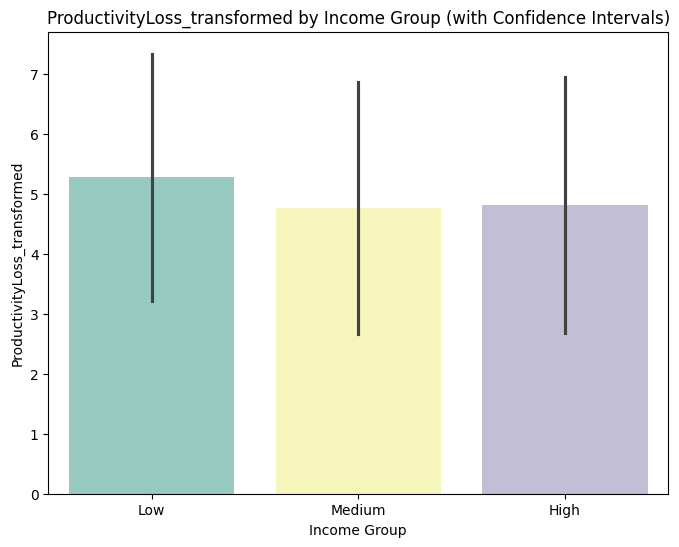

<ipython-input-60-9257b06b6c13>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


<ipython-input-60-9257b06b6c13>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




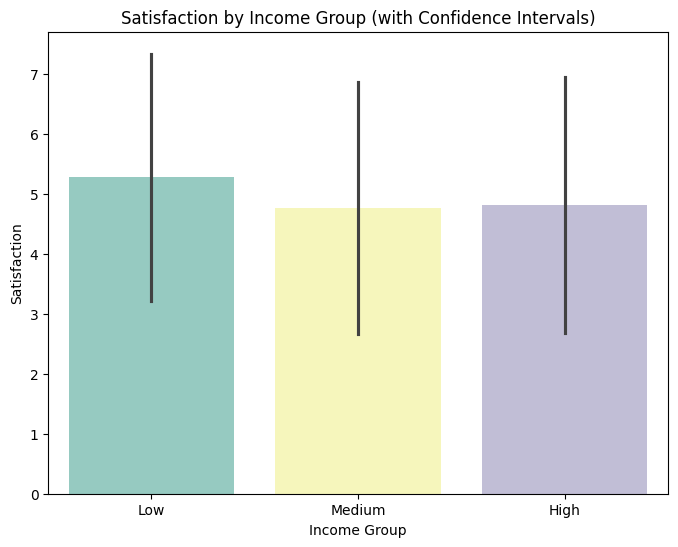

<ipython-input-60-9257b06b6c13>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


<ipython-input-60-9257b06b6c13>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




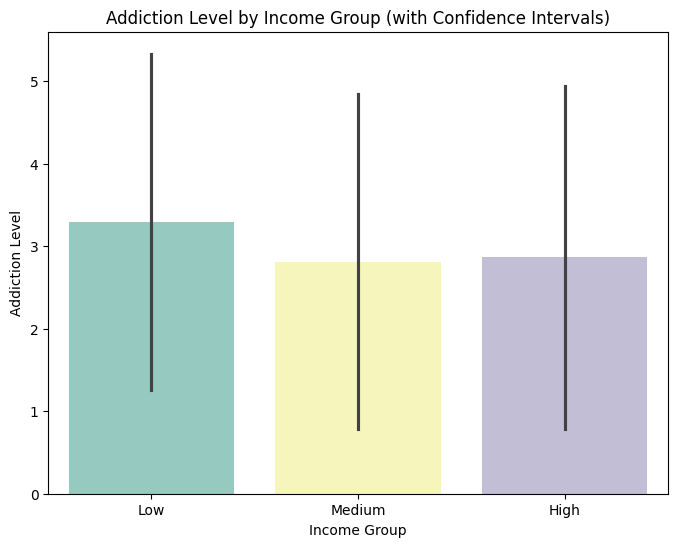

<ipython-input-60-9257b06b6c13>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


<ipython-input-60-9257b06b6c13>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




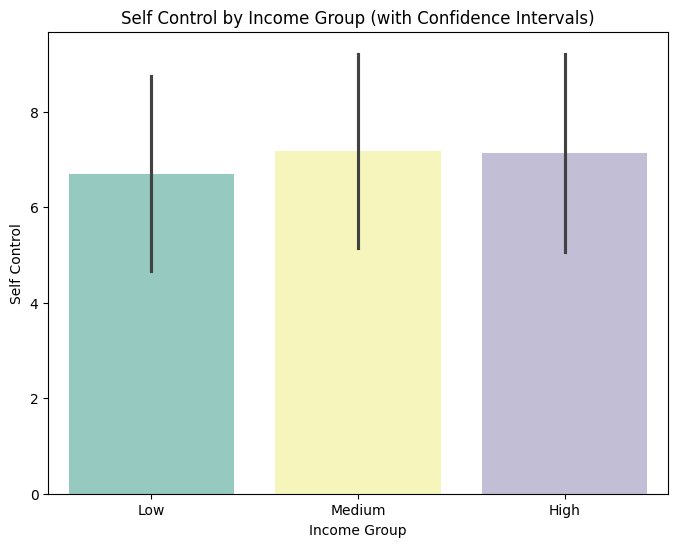

In [60]:
for var in ['ProductivityLoss_transformed', 'Satisfaction', 'Addiction Level', 'Self Control']:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df_income, x='Income Group', y=var, ci="sd", palette='Set3')
    plt.title(f'{var} by Income Group (with Confidence Intervals)')
    plt.ylabel(var)
    plt.xlabel('Income Group')
    plt.show()

In [61]:
# ANOVA for Engagement
anova_engagement = f_oneway(
    *[df_income[df_income['Income Group'] == group]['Engagement'] for group in df_income['Income Group'].unique()]
)
print(f"ANOVA for Engagement by Income Group: F-statistic={anova_engagement.statistic:.2f}, P-value={anova_engagement.pvalue:.4f}")

# ANOVA for Total Time Spent
anova_time_spent = f_oneway(
    *[df_income[df_income['Income Group'] == group]['Total Time Spent'] for group in df_income['Income Group'].unique()]
)
print(f"ANOVA for Total Time Spent by Income Group: F-statistic={anova_time_spent.statistic:.2f}, P-value={anova_time_spent.pvalue:.4f}")

ANOVA for Engagement by Income Group: F-statistic=0.28, P-value=0.7561
ANOVA for Total Time Spent by Income Group: F-statistic=0.97, P-value=0.3794


# 7. Key patterns of screen time usage

Time of Usage

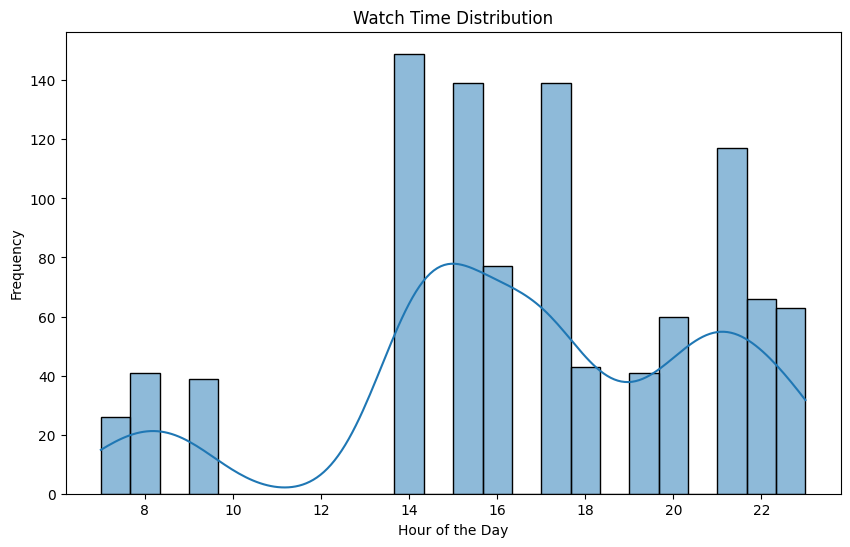

In [62]:
df['Watch Time'] = pd.to_datetime(df['Watch Time'], format='%I:%M %p').dt.hour

# Plot the distribution of watch time
plt.figure(figsize=(10, 6))
sns.histplot(df['Watch Time'], bins=24, kde=True)
plt.title('Watch Time Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

Platform

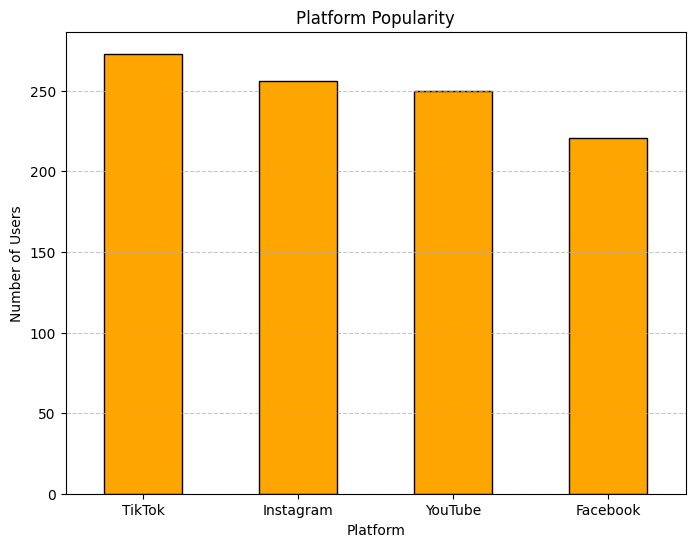

In [63]:
platform_usage = df['Platform'].value_counts()

plt.figure(figsize=(8, 6))
platform_usage.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Platform Popularity')
plt.xlabel('Platform')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Video Category

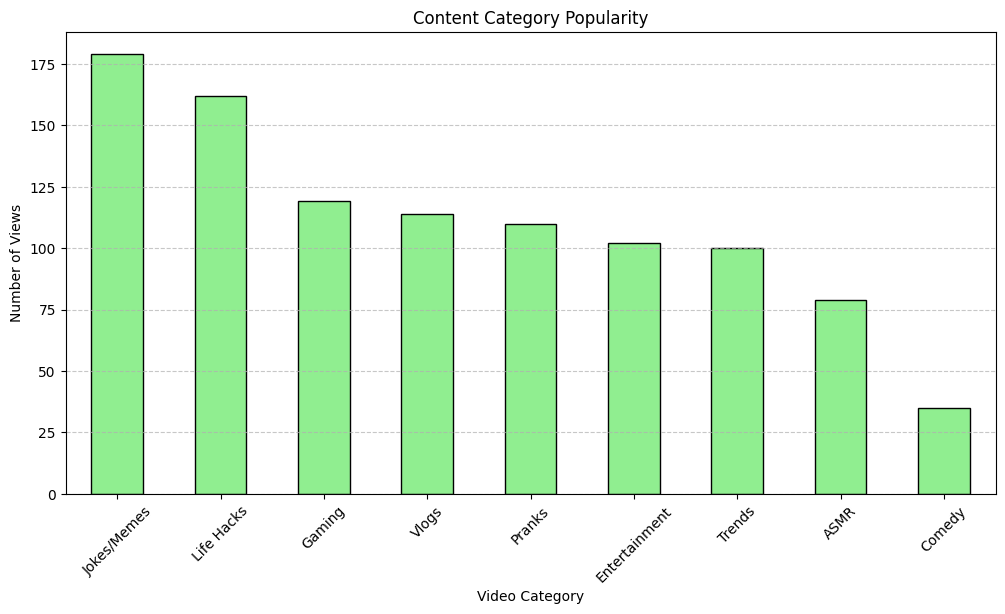

In [64]:
content_usage = df['Video Category'].value_counts()


plt.figure(figsize=(12, 6))
content_usage.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Content Category Popularity')
plt.xlabel('Video Category')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   UserID                        1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Location                      1000 non-null   object 
 4   Income                        1000 non-null   int64  
 5   Debt                          1000 non-null   bool   
 6   Owns Property                 1000 non-null   bool   
 7   Profession                    1000 non-null   object 
 8   Demographics                  1000 non-null   object 
 9   Platform                      1000 non-null   object 
 10  Total Time Spent              1000 non-null   int64  
 11  Number of Sessions            1000 non-null   int64  
 12  Video ID                      1000 non-null   int64  
 13  Vide

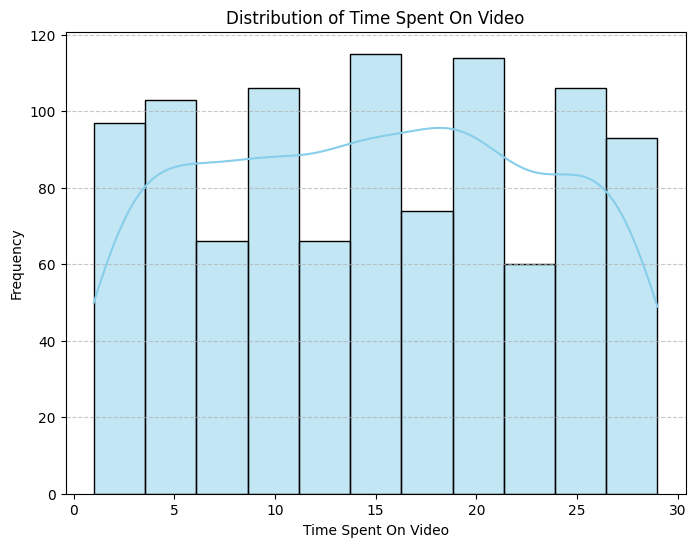

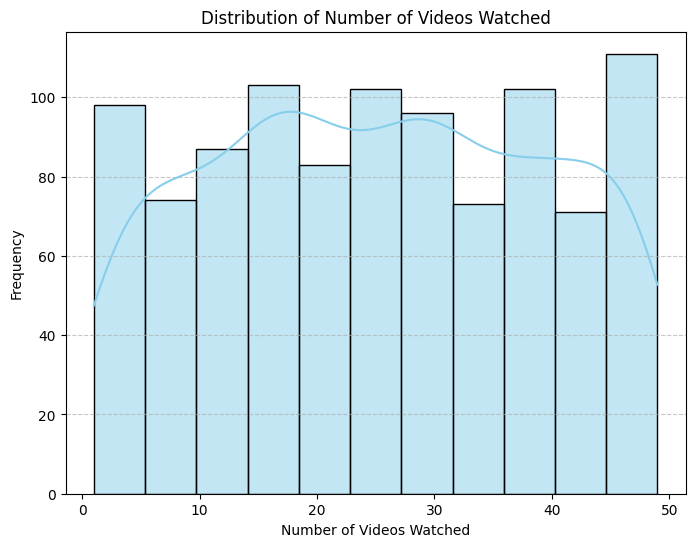

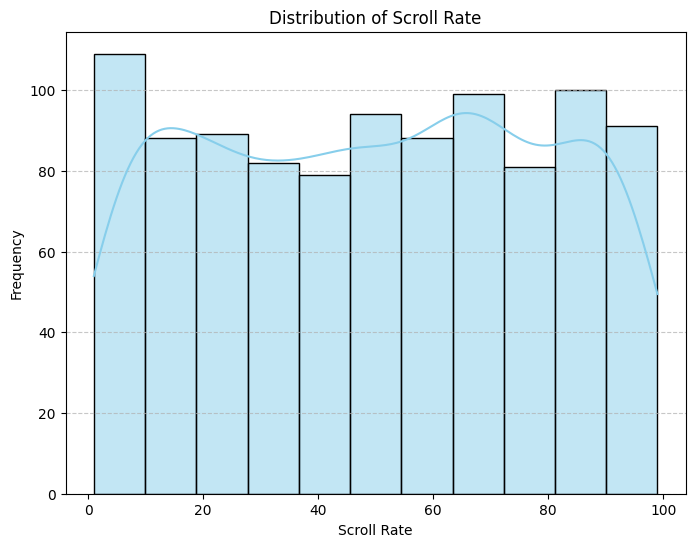

In [66]:
variables = ['Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate']


for var in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

DAY TIME

In [67]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,Watch Time (hours),ProductivityLoss_transformed,Cluster
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,Smartphone,Android,21,5,5,Commuting,Mobile Data,21.0,7,0
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,Computer,Android,17,7,3,At school,Wi-Fi,17.0,5,2
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,Tablet,Android,14,8,2,At home,Mobile Data,14.0,4,2
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,Smartphone,Android,21,5,5,Commuting,Mobile Data,21.0,7,0
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,Smartphone,iOS,8,10,0,At home,Mobile Data,8.0,2,1


In [68]:
df_time = df.copy()
def categorize_time_of_day(time):
    if 6 <= time < 12:
        return 'Morning'
    elif 12 <= time < 18:
        return 'Afternoon'
    elif 18 <= time < 24:
        return 'Evening'
    else:
        return 'Night'

df_time['Time of Day'] = df_time['Watch Time'].apply(categorize_time_of_day)

In [69]:
df_time.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,Watch Time (hours),ProductivityLoss_transformed,Cluster,Time of Day
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,Android,21,5,5,Commuting,Mobile Data,21.0,7,0,Evening
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,Android,17,7,3,At school,Wi-Fi,17.0,5,2,Afternoon
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,Android,14,8,2,At home,Mobile Data,14.0,4,2,Afternoon
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,Android,21,5,5,Commuting,Mobile Data,21.0,7,0,Evening
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,iOS,8,10,0,At home,Mobile Data,8.0,2,1,Morning


In [70]:
print("ANOVA by Time of Day:")
for var in ['ProductivityLoss_transformed', 'Satisfaction', 'Self Control', 'Addiction Level']:
    anova_result = f_oneway(
        *[df_time[df_time['Time of Day'] == tod][var] for tod in df_time['Time of Day'].unique()]
    )
    print(f"{var} and Time of Day: F-statistic={anova_result.statistic:.2f}, P-value={anova_result.pvalue:.4f}")

ANOVA by Time of Day:
ProductivityLoss_transformed and Time of Day: F-statistic=269.52, P-value=0.0000
Satisfaction and Time of Day: F-statistic=269.52, P-value=0.0000
Self Control and Time of Day: F-statistic=268.75, P-value=0.0000
Addiction Level and Time of Day: F-statistic=268.75, P-value=0.0000


In [71]:
#Tukey HSD

for var in ['ProductivityLoss_transformed', 'Satisfaction', 'Self Control', 'Addiction Level']:
    tukey = pairwise_tukeyhsd(df_time[var], df_time['Time of Day'])
    print(f"\nTukey HSD for {var} by Time of Day:")
    print(tukey)


Tukey HSD for ProductivityLoss_transformed by Time of Day:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
Afternoon Evening   2.0474   0.0  1.7765  2.3184   True
Afternoon Morning  -1.7406   0.0 -2.1698 -1.3113   True
  Evening Morning   -3.788   0.0  -4.228  -3.348   True
-------------------------------------------------------

Tukey HSD for Satisfaction by Time of Day:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
Afternoon Evening   2.0474   0.0  1.7765  2.3184   True
Afternoon Morning  -1.7406   0.0 -2.1698 -1.3113   True
  Evening Morning   -3.788   0.0  -4.228  -3.348   True
-------------------------------------------------------

Tukey HSD for Self Control by Time of Day:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   g

<ipython-input-72-670d1cd7f5bf>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




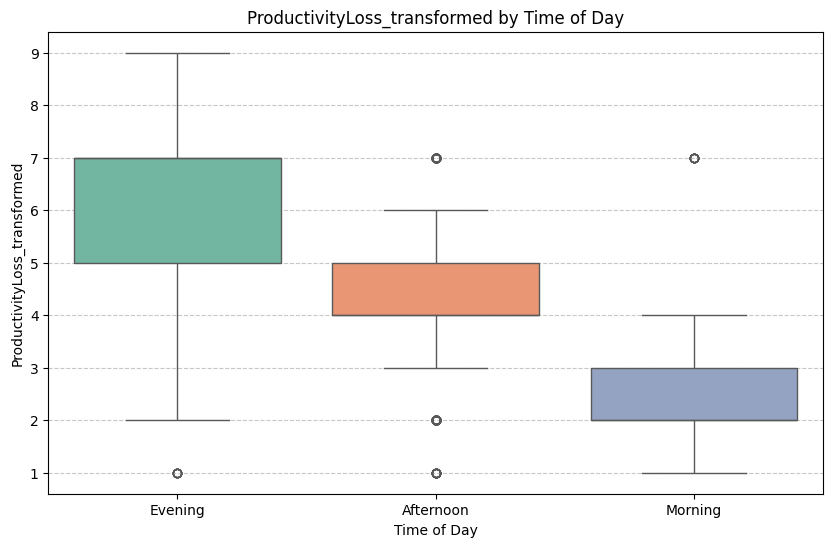

<ipython-input-72-670d1cd7f5bf>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




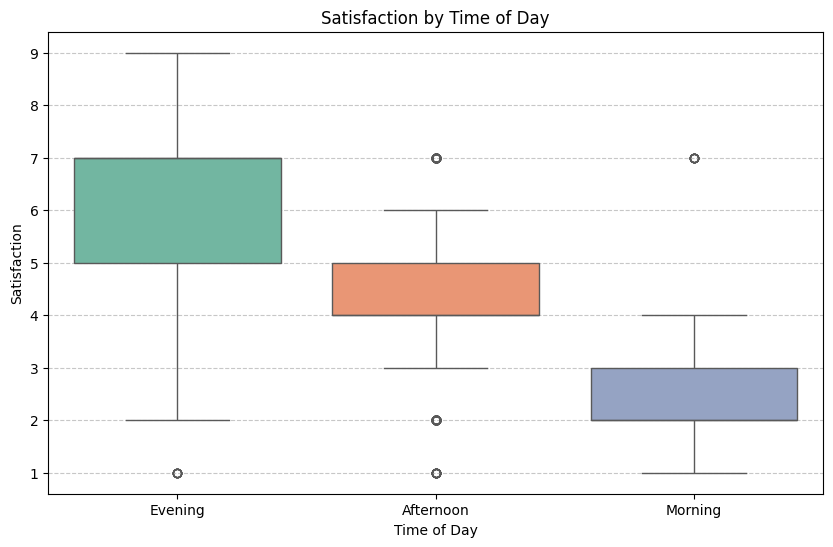

<ipython-input-72-670d1cd7f5bf>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




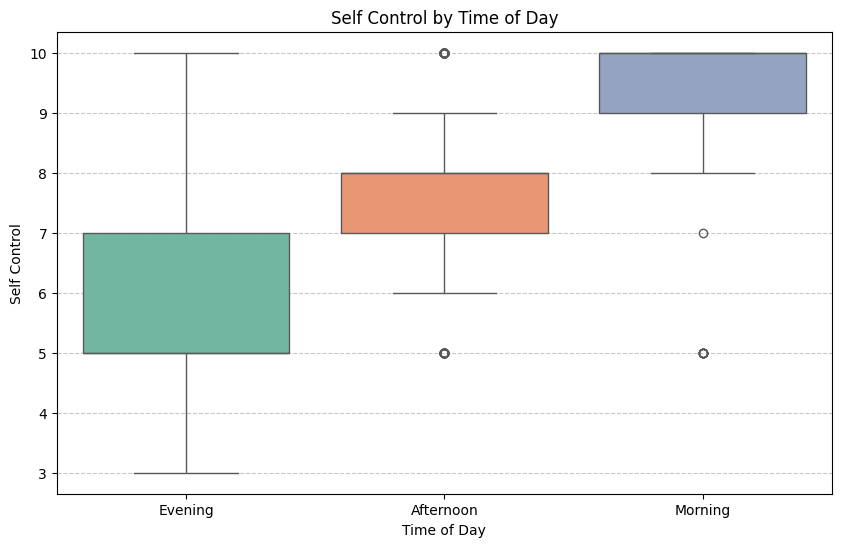

<ipython-input-72-670d1cd7f5bf>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




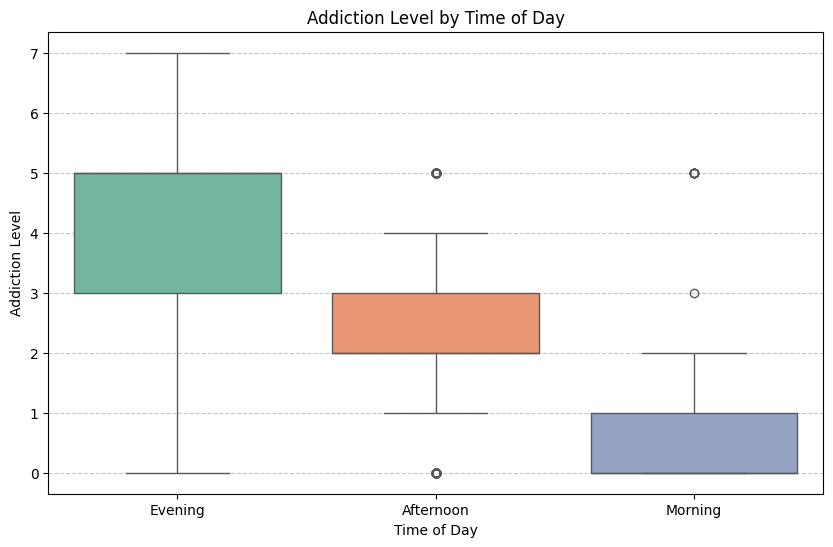

In [72]:
for var in ['ProductivityLoss_transformed', 'Satisfaction', 'Self Control', 'Addiction Level']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_time, x='Time of Day', y=var, palette='Set2')
    plt.title(f'{var} by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel(var)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [73]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,Watch Time (hours),ProductivityLoss_transformed,Cluster
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,Smartphone,Android,21,5,5,Commuting,Mobile Data,21.0,7,0
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,Computer,Android,17,7,3,At school,Wi-Fi,17.0,5,2
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,Tablet,Android,14,8,2,At home,Mobile Data,14.0,4,2
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,Smartphone,Android,21,5,5,Commuting,Mobile Data,21.0,7,0
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,Smartphone,iOS,8,10,0,At home,Mobile Data,8.0,2,1


In [74]:
platform_time_crosstab = pd.crosstab(df_time['Platform'], df_time['Time of Day'])
print(platform_time_crosstab)

# Хи-квадрат тест
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(platform_time_crosstab)
print(f"Chi-square statistic={chi2}, P-value={p}")

Time of Day  Afternoon  Evening  Morning
Platform                                
Facebook           116       81       24
Instagram          124      108       24
TikTok             127      113       33
YouTube            137       88       25
Chi-square statistic=5.499772212918017, P-value=0.48148423631022086


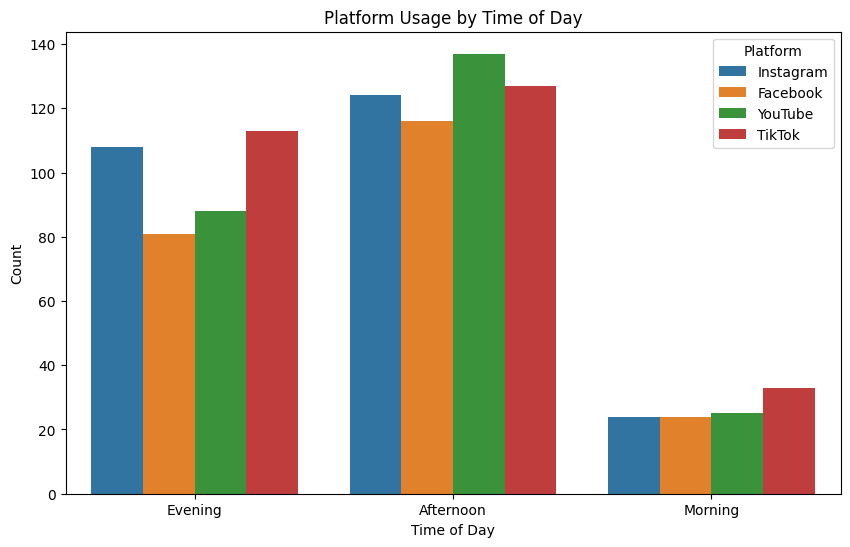

In [75]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df_time, x='Time of Day', hue='Platform')
plt.title('Platform Usage by Time of Day')
plt.ylabel('Count')
plt.show()

In [76]:
content_time_crosstab = pd.crosstab(df_time['Video Category'], df_time['Time of Day'])
print(content_time_crosstab)

chi2, p, dof, expected = chi2_contingency(content_time_crosstab)
print(f"Chi-square statistic={chi2}, P-value={p}")

Time of Day     Afternoon  Evening  Morning
Video Category                             
ASMR                   43       28        8
Comedy                 20       13        2
Entertainment          57       37        8
Gaming                 60       48       11
Jokes/Memes            85       74       20
Life Hacks             79       65       18
Pranks                 48       44       18
Trends                 55       41        4
Vlogs                  57       40       17
Chi-square statistic=15.800874857683773, P-value=0.4669426930536287


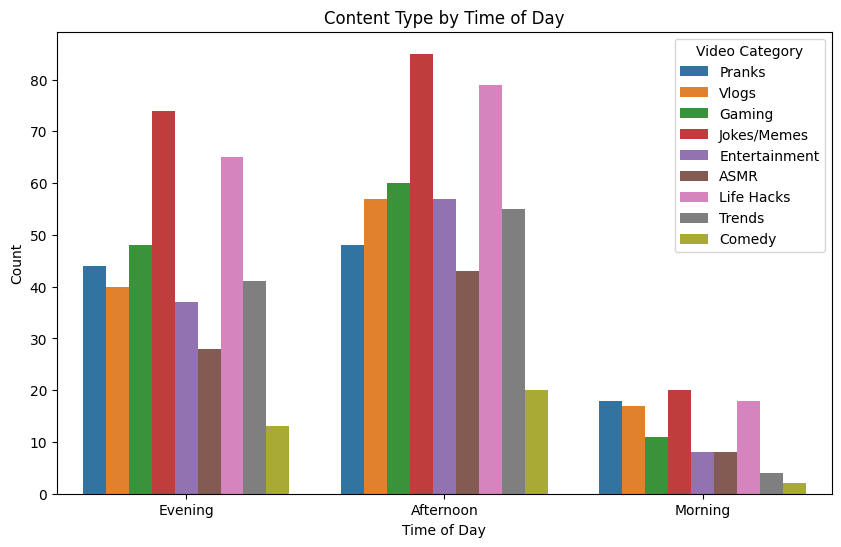

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_time, x='Time of Day', hue='Video Category')
plt.title('Content Type by Time of Day')
plt.ylabel('Count')
plt.show()

# Cluster analysis

In [78]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,Watch Time (hours),ProductivityLoss_transformed,Cluster
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,Smartphone,Android,21,5,5,Commuting,Mobile Data,21.0,7,0
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,Computer,Android,17,7,3,At school,Wi-Fi,17.0,5,2
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,Tablet,Android,14,8,2,At home,Mobile Data,14.0,4,2
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,Smartphone,Android,21,5,5,Commuting,Mobile Data,21.0,7,0
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,Smartphone,iOS,8,10,0,At home,Mobile Data,8.0,2,1


In [79]:
columns_to_analyze = ['Engagement', 'Scroll Rate', 'Number of Videos Watched', 'Time Spent On Video',
                      'Income', 'Age', 'Total Time Spent', 'Number of Sessions',
                      'Platform', 'Location', 'DeviceType', 'Video Category']


quantitative_stats = df.groupby('Cluster')[
    ['Engagement', 'Scroll Rate', 'Number of Videos Watched', 'Time Spent On Video',
     'Income', 'Age', 'Total Time Spent', 'Number of Sessions']
].mean()

print("Quantitative Descriptive Statistics by Cluster:")
print(quantitative_stats)

Quantitative Descriptive Statistics by Cluster:
          Engagement  Scroll Rate  Number of Videos Watched  \
Cluster                                                       
0        5147.915014    50.606232                 26.005666   
1        4952.983402    49.688797                 26.236515   
2        4892.305419    49.100985                 24.002463   

         Time Spent On Video        Income        Age  Total Time Spent  \
Cluster                                                                   
0                  14.988669  58223.915014  41.830028        152.113314   
1                  14.763485  61682.398340  41.315353        149.904564   
2                  15.083744  59373.677340  40.056650        151.682266   

         Number of Sessions  
Cluster                      
0                  9.674221  
1                 10.788382  
2                  9.847291  


In [80]:

#  ANOVA
for var in ['Engagement', 'Scroll Rate', 'Number of Videos Watched', 'Time Spent On Video',
            'Income', 'Age', 'Total Time Spent']:
    anova_result = f_oneway(
        *[df[df['Cluster'] == cluster][var] for cluster in df['Cluster'].unique()]
    )
    print(f"ANOVA for {var} by Cluster: F-statistic={anova_result.statistic:.2f}, P-value={anova_result.pvalue:.4f}")

ANOVA for Engagement by Cluster: F-statistic=0.76, P-value=0.4658
ANOVA for Scroll Rate by Cluster: F-statistic=0.25, P-value=0.7774
ANOVA for Number of Videos Watched by Cluster: F-statistic=2.72, P-value=0.0662
ANOVA for Time Spent On Video by Cluster: F-statistic=0.12, P-value=0.8904
ANOVA for Income by Cluster: F-statistic=1.54, P-value=0.2158
ANOVA for Age by Cluster: F-statistic=1.73, P-value=0.1784
ANOVA for Total Time Spent by Cluster: F-statistic=0.05, P-value=0.9482


In [81]:
datasets = {
    'Original_Data': df,
    'Time_Analyzed_Data': df_time,
    'Encoded_Data': df_final_encoded,
    'Income_Analysis': df_income,

}

# Save in Excel
with pd.ExcelWriter('datasets_summary.xlsx') as writer:
    for sheet_name, data in datasets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

print("Saved in  'datasets_summary.xlsx'")

Saved in  'datasets_summary.xlsx'
